## Business Objectives
- Our Main Objective is to predict sales of store in a week. As in dataset size and time related data are given as feature, so analyze if sales are impacted by time-based factors and space- based factor. Most importantly how inclusion of holidays in a week soars the sales in store?

In [1]:
import numpy as np  
import pandas as pd    
from pandas.plotting import autocorrelation_plot as auto_corr
import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns

In [2]:
dfdata_store = pd.read_csv("C:/Users/utkar/Downloads/stores.csv")

In [3]:
df_train = pd.read_csv("C:/Users/utkar/Downloads/train.csv")

In [4]:
df_features = pd.read_csv("C:/Users/utkar/Downloads/features.csv")

In [5]:
dfdata_store

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [6]:
df_train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [7]:
df_features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [8]:
dfdata_store.head(10)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [9]:
df_train.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
5,1,1,2010-03-12,21043.39,False
6,1,1,2010-03-19,22136.64,False
7,1,1,2010-03-26,26229.21,False
8,1,1,2010-04-02,57258.43,False
9,1,1,2010-04-09,42960.91,False


In [10]:
df_features.head(10)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,2010-03-12,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,2010-03-19,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,2010-03-26,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,1,2010-04-02,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,1,2010-04-09,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False


In [11]:
dfdata_store.shape

(45, 3)

In [12]:
dfdata_store.size

135

In [13]:
dfdata_store.dtypes

Store     int64
Type     object
Size      int64
dtype: object

In [14]:
dfdata_store.info

<bound method DataFrame.info of     Store Type    Size
0       1    A  151315
1       2    A  202307
2       3    B   37392
3       4    A  205863
4       5    B   34875
5       6    A  202505
6       7    B   70713
7       8    A  155078
8       9    B  125833
9      10    B  126512
10     11    A  207499
11     12    B  112238
12     13    A  219622
13     14    A  200898
14     15    B  123737
15     16    B   57197
16     17    B   93188
17     18    B  120653
18     19    A  203819
19     20    A  203742
20     21    B  140167
21     22    B  119557
22     23    B  114533
23     24    A  203819
24     25    B  128107
25     26    A  152513
26     27    A  204184
27     28    A  206302
28     29    B   93638
29     30    C   42988
30     31    A  203750
31     32    A  203007
32     33    A   39690
33     34    A  158114
34     35    B  103681
35     36    A   39910
36     37    C   39910
37     38    C   39690
38     39    A  184109
39     40    A  155083
40     41    A  196321
41

In [15]:
df_features.shape

(8190, 12)

In [16]:
df_features.size

98280

In [17]:
df_features.dtypes

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object

In [18]:
df_features.info

<bound method DataFrame.info of       Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0         1  2010-02-05        42.31       2.572        NaN        NaN   
1         1  2010-02-12        38.51       2.548        NaN        NaN   
2         1  2010-02-19        39.93       2.514        NaN        NaN   
3         1  2010-02-26        46.63       2.561        NaN        NaN   
4         1  2010-03-05        46.50       2.625        NaN        NaN   
...     ...         ...          ...         ...        ...        ...   
8185     45  2013-06-28        76.05       3.639    4842.29     975.03   
8186     45  2013-07-05        77.50       3.614    9090.48    2268.58   
8187     45  2013-07-12        79.37       3.614    3789.94    1827.31   
8188     45  2013-07-19        82.84       3.737    2961.49    1047.07   
8189     45  2013-07-26        76.06       3.804     212.02     851.73   

      MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0 

In [19]:
df_train.shape

(421570, 5)

In [20]:
df_train.size

2107850

In [21]:
df_train.info

<bound method DataFrame.info of         Store  Dept        Date  Weekly_Sales  IsHoliday
0           1     1  2010-02-05      24924.50      False
1           1     1  2010-02-12      46039.49       True
2           1     1  2010-02-19      41595.55      False
3           1     1  2010-02-26      19403.54      False
4           1     1  2010-03-05      21827.90      False
...       ...   ...         ...           ...        ...
421565     45    98  2012-09-28        508.37      False
421566     45    98  2012-10-05        628.10      False
421567     45    98  2012-10-12       1061.02      False
421568     45    98  2012-10-19        760.01      False
421569     45    98  2012-10-26       1076.80      False

[421570 rows x 5 columns]>

In [22]:
df_train.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

In [23]:
df_train.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [24]:
dfdata = df_train.merge(df_features, on = ["Store", "Date"], how = "inner").merge(dfdata_store, on = ["Store"], how = "inner")

In [25]:
dfdata.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
5,1,6,2010-02-05,5749.03,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
6,1,7,2010-02-05,21084.08,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
7,1,8,2010-02-05,40129.01,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
8,1,9,2010-02-05,16930.99,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
9,1,10,2010-02-05,30721.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315


In [26]:
dfdata.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y', 'Type', 'Size'],
      dtype='object')

## DATA CLEANING

- FINDING THE DUPLICATE RECORDS AND NULL VALLUES

In [27]:
dfdata.duplicated()         # function to find duplicated values

0         False
1         False
2         False
3         False
4         False
          ...  
421565    False
421566    False
421567    False
421568    False
421569    False
Length: 421570, dtype: bool

- This function only returned the top 5 rows and the bottom 5 rows its has not give the neccessary information required to the direct duplicate values in a dataset

In [28]:
dfdata[dfdata.duplicated()]   # This formulae will only give that contain duplicate values

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size


- There are no duplicate values found in a dataset 

In [29]:
dfdata.duplicated().sum()

0

## FINDING NULL VALUES

In [30]:
dfdata.isnull()   # Using isnull function will return the series of a boolean values the comfirm null areas

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,False,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False
2,False,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False
3,False,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
421566,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
421567,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
421568,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [31]:
dfdata.isnull().sum()     # This will generate total null values in the dataset

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
Type                 0
Size                 0
dtype: int64

<AxesSubplot:>

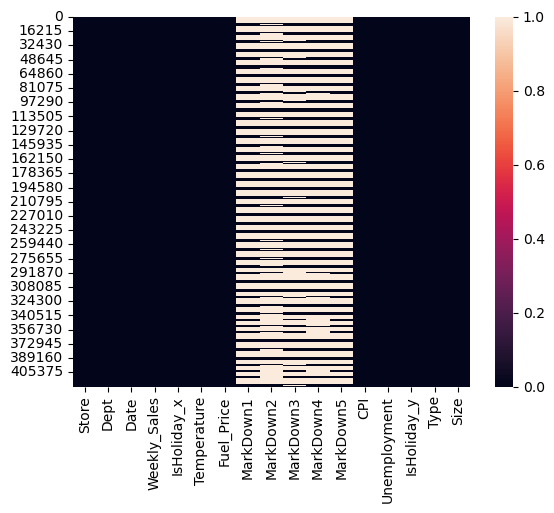

In [32]:
 #using seaborn to vizualize the nullvalues in the data set
sns.heatmap(dfdata.isnull())

In [33]:
dfdata.drop(["IsHoliday_y"], axis = 1, inplace = True)   # removing dublicated column

In [34]:
dfdata.rename(columns = {"IsHoliday_x":"IsHoliday"}, inplace = True)

In [35]:
dfdata.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


## STORE AND DEPARTMENT

In [36]:
dfdata["Store"].nunique()

45

In [37]:
dfdata["Dept"].nunique()

81

In [38]:
store_dept = pd.pivot_table(dfdata, index = "Store", columns = "Dept", values = "Weekly_Sales", aggfunc = np.mean)

In [39]:
display(store_dept)

Dept,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
Store,,,,,,,,,,,,,,,,,,,,,
1,22513.322937,46102.090420,13150.478042,36964.154476,24257.941119,4801.780140,24566.487413,35718.257622,28062.052238,31033.386364,...,82427.547832,64238.943427,135458.969510,71699.182378,63180.568182,120772.062168,33251.831639,35207.348811,11827.770769,306.091081
2,30777.980769,65912.922517,17476.563357,45607.666573,30555.315315,6808.382517,40477.837063,58707.369441,34375.864476,38845.854476,...,97611.537133,80610.380350,164840.230979,70581.977063,70018.672517,143588.751888,34319.063846,40697.204056,14035.400839,475.896905
3,7328.621049,16841.775664,5509.300769,8434.186503,11695.366573,2012.411818,10044.341608,8310.254196,9062.007692,10871.944126,...,1540.049161,318.685594,7568.280210,NaN,656.294444,15745.528252,3934.540000,343.437357,30.570833,NaN
4,36979.940070,93639.315385,19012.491678,56603.400140,45668.406783,8241.777692,50728.151399,62949.723776,34437.170979,37269.667413,...,89248.965524,66535.407203,159365.107902,67815.163007,68159.106573,147236.473706,38346.573077,39339.238951,15009.249371,623.182381
5,9774.553077,12317.953287,4101.085175,9860.806783,6699.202238,1191.057622,6124.484336,13735.709441,7919.805944,9783.395385,...,3059.520000,1457.221678,7759.205594,NaN,411.431486,19340.693986,5985.671119,667.070315,29.976087,NaN
6,23867.553776,50269.437273,16806.638811,34187.366503,34465.307622,7225.566643,34526.870420,47577.719790,48271.060140,47436.477902,...,53715.366084,45270.405175,99024.796503,41359.651189,41701.693497,89208.786294,30450.542238,20637.667063,9728.100629,388.636750
7,9542.801259,22603.690769,8633.536923,14950.518601,13860.350490,6329.928811,10925.757063,13970.619371,29722.736084,21136.560280,...,13858.405874,10263.880000,26530.890559,1328.178252,699.332522,34208.097273,1123.383217,4374.927902,260.886596,15.000000
8,14789.827343,35729.821748,10683.305105,21089.309301,19838.849231,3395.425455,20268.743776,26438.524336,11792.661678,20666.433776,...,39333.566154,31530.560909,60465.630000,27515.635315,25442.578042,62951.463706,16.986667,16978.366503,6880.466434,298.153714
9,11846.558252,24969.477413,7497.356783,17165.947762,19282.746014,2806.416364,13826.694336,21424.470699,13196.569720,12810.480350,...,2981.249510,869.273287,14123.063147,21.240000,599.112568,29575.050769,3596.107762,372.655556,27.930000,NaN


- Store numbers begin from 1 to 45, department numbers are from 1 to 99, but some numbers are missing such as there is no 88 or 89 etc. Total number of departments is 81.

- From the pivot table, it is obviously seen that there are some wrong values such as there are 0 and minus values for weekly sales. But sales amount can not be minus. Also, it is impossible for one department not to sell anything whole week.

In [40]:
dfdata.loc[dfdata["Weekly_Sales"] <=0]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
188,1,47,2010-02-19,-863.00,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
406,1,47,2010-03-12,-698.00,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,A,151315
2549,1,47,2010-10-08,-58.00,False,63.93,2.633,NaN,NaN,NaN,NaN,NaN,211.746754,7.838,A,151315
3632,1,54,2011-01-21,-50.00,False,44.04,3.016,NaN,NaN,NaN,NaN,NaN,211.827234,7.742,A,151315
4132,1,47,2011-03-11,0.00,False,53.56,3.459,NaN,NaN,NaN,NaN,NaN,214.111056,7.742,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420066,45,49,2012-05-25,-4.97,False,67.21,3.798,5370.39,NaN,361.22,1287.62,2461.81,191.002810,8.567,B,118221
420403,45,49,2012-06-29,-34.00,False,75.22,3.506,3291.36,425.60,NaN,314.88,2255.34,191.099246,8.567,B,118221
420736,45,49,2012-08-03,-1.91,False,76.58,3.654,24853.05,39.56,17.96,11142.69,2768.32,191.164090,8.684,B,118221
421007,45,54,2012-08-31,0.00,False,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,191.461281,8.684,B,118221


- 1358 rows in 421570 rows means 0.3%, so I can delete and ignore these rows which contains wrong sales values

In [41]:
dfdata = dfdata.loc[dfdata["Weekly_Sales"] > 0]

In [42]:
dfdata

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221


In [43]:
dfdata.shape  

(420212, 16)

- New data shape

In [44]:
dfdata.size

6723392

## DATE 

In [45]:
import math
from datetime import datetime
from datetime import timedelta
import warnings
warnings.filterwarnings("ignore")

In [46]:
dfdata["Date"].head(5).append(dfdata["Date"].tail(5))

0         2010-02-05
1         2010-02-05
2         2010-02-05
3         2010-02-05
4         2010-02-05
421565    2012-10-26
421566    2012-10-26
421567    2012-10-26
421568    2012-10-26
421569    2012-10-26
Name: Date, dtype: object

- it shows Our data is from 5th of February 2010 to 26th of October 2012.

## HOLIDAY COLUMN

<AxesSubplot:xlabel='IsHoliday', ylabel='Weekly_Sales'>

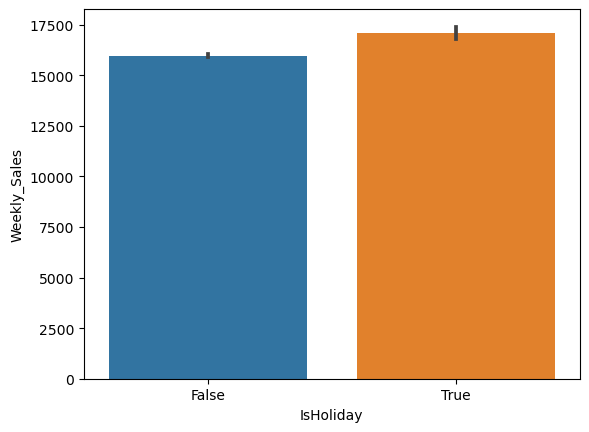

In [47]:
sns.barplot(x = "IsHoliday", y="Weekly_Sales", data = dfdata)

In [48]:
dfdata_holiday = dfdata.loc[dfdata["IsHoliday"]== True]

In [49]:
dfdata_holiday["Date"].unique()

array(['2010-02-12', '2010-09-10', '2010-11-26', '2010-12-31',
       '2011-02-11', '2011-09-09', '2011-11-25', '2011-12-30',
       '2012-02-10', '2012-09-07'], dtype=object)

In [50]:
dfdata_not_holiday = dfdata.loc[dfdata["IsHoliday"]== False]

In [51]:
dfdata_not_holiday["Date"].nunique()

133

- All holidays are not in the data. There are 4 holiday values such as;

- Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

- Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

- Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

- Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

- After the 07-Sep-2012 holidays are in test set for prediction. When we look at the data, average weekly sales for holidays are significantly higher than not-holiday days. In train data, there are 133 weeks for non-holiday and 10 weeks for holiday.

- I want to see differences between holiday types. So, I create new columns for 4 types of holidays and fill them with boolean values. If date belongs to this type of holiday it is True, if not False.

In [52]:
 # super bowl dates in train set

dfdata.loc[(dfdata['Date'] == '2010-02-12')|(dfdata['Date'] == '2011-02-11')|(dfdata['Date'] == '2012-02-10'),'Super_Bowl'] = True
dfdata.loc[(dfdata['Date'] != '2010-02-12')&(dfdata['Date'] != '2011-02-11')&(dfdata['Date'] != '2012-02-10'),'Super_Bowl'] = False

In [53]:
# Labor day dates in train set
dfdata.loc[(dfdata['Date'] == '2010-09-10')|(dfdata['Date'] == '2011-09-09')|(dfdata['Date'] == '2012-09-07'),'Labor_Day'] = True
dfdata.loc[(dfdata['Date'] != '2010-09-10')&(dfdata['Date'] != '2011-09-09')&(dfdata['Date'] != '2012-09-07'),'Labor_Day'] = False

In [54]:
#Thanksgiving dates in train set
dfdata.loc[(dfdata["Date"] == '2010-11-26') | (dfdata["Date"] =='2011-11-25'), "Thanksgiving"]= True
dfdata.loc[(dfdata["Date"] != '2010-11-26') &(dfdata["Date"] != '2011-11-25'),"Thanksgiving"]= False

In [55]:
# Christmas dates in train set
dfdata.loc[(dfdata["Date"] =='2010-12-31') | (dfdata["Date"] == '2011-12-30'), "christmas"] = True
dfdata.loc[(dfdata["Date"] !='2010-12-31') & (dfdata["Date"] != '2011-12-30'), "christmas"] = False


<AxesSubplot:xlabel='christmas', ylabel='Weekly_Sales'>

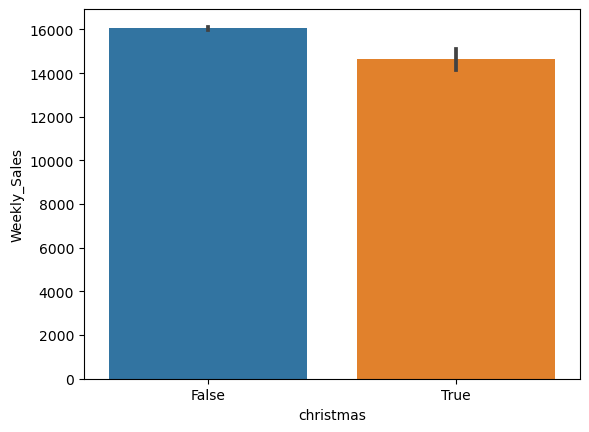

In [56]:
sns.barplot(x='christmas', y='Weekly_Sales', data=dfdata) # Christmas holiday vs not-Christmas

<AxesSubplot:xlabel='Thanksgiving', ylabel='Weekly_Sales'>

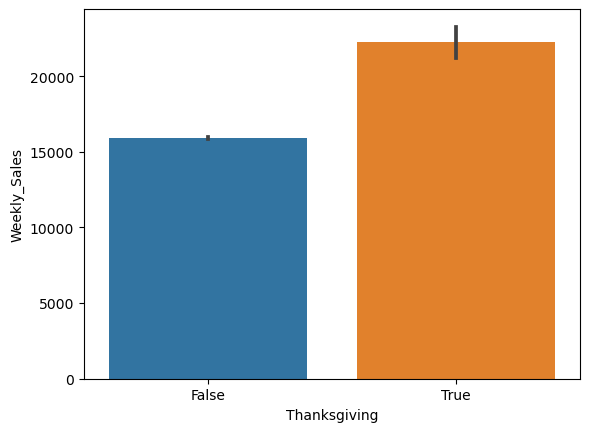

In [57]:
sns.barplot(x = "Thanksgiving", y = "Weekly_Sales", data = dfdata)  # Thanksgiving holiday vs not-thanksgiving

<AxesSubplot:xlabel='Labor_Day', ylabel='Weekly_Sales'>

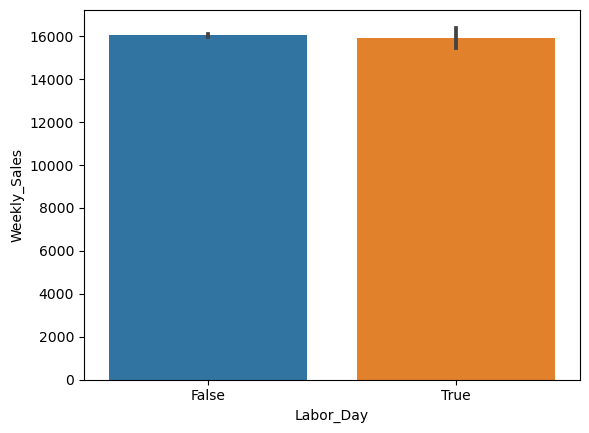

In [58]:
sns.barplot(x = "Labor_Day", y = 'Weekly_Sales', data = dfdata) # Labor_Day Holiday vs non- labor day holiday

<AxesSubplot:xlabel='Labor_Day', ylabel='Weekly_Sales'>

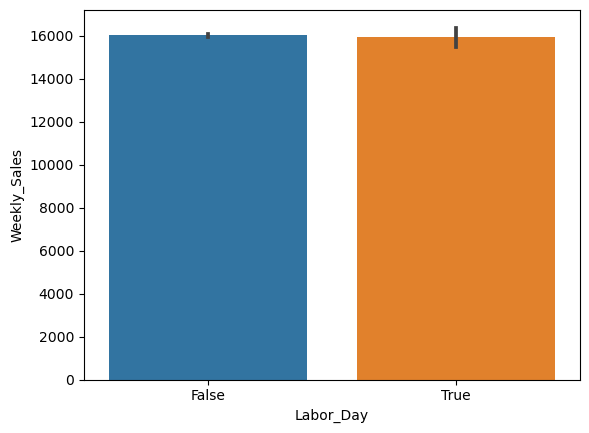

In [59]:
sns.barplot(x='Labor_Day', y='Weekly_Sales', data=dfdata) # Labor day holiday vs not-labor day

- It is shown that for the graphs, Labor Day and Christmas do not increase weekly average sales. There is positive effect on sales in Super bowl, but the highest difference is in the Thanksgiving. I think, people generally prefer to buy Christmas gifts 1-2 weeks before Christmas, so it does not change sales in the Christmas week. And, there is Black Friday sales in the Thanksgiving week.

## TYPE OF EFFECT ON HOLIDAYS

- THERE ARE THREE DIFFERENT TYPES OF STORES ARE PRESENT IN THE DATA AS A, B AND C

In [60]:
dfdata.groupby(["christmas", "Type"])["Weekly_Sales"].mean()  # Avg weekly sales for types on Christmas 

christmas  Type
False      A       20174.350209
           B       12301.986116
           C        9570.951973
True       A       18310.167535
           B       11488.988057
           C        8031.520607
Name: Weekly_Sales, dtype: float64

In [61]:
dfdata.groupby(["Labor_Day"])["Weekly_Sales"].mean()    # Avg weekly sales for types on Labor Day

Labor_Day
False    16035.241190
True     15934.061154
Name: Weekly_Sales, dtype: float64

In [62]:
dfdata.groupby(["Thanksgiving"])["Weekly_Sales"].mean()     # Avg weekly sales for types on Thanksgiving

Thanksgiving
False    15943.601687
True     22269.601768
Name: Weekly_Sales, dtype: float64

In [63]:
dfdata.groupby(["Super_Bowl"])["Weekly_Sales"].mean()

Super_Bowl
False    16024.795449
True     16418.777595
Name: Weekly_Sales, dtype: float64

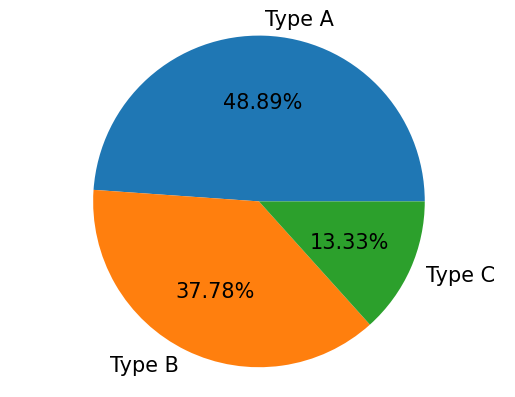

In [64]:
data = [48.88, 37.77 , 13.33 ]  
labels = 'Type A','Type B', 'Type C' 
plt.pie(data,labels=labels,autopct='%0.2f%%', textprops={'fontsize': 15}) 
plt.axis('equal')
mpl.rcParams.update({'font.size': 20})

plt.show()

In [65]:
dfdata.groupby('IsHoliday')['Weekly_Sales'].mean()

IsHoliday
False    15952.816352
True     17094.300918
Name: Weekly_Sales, dtype: float64

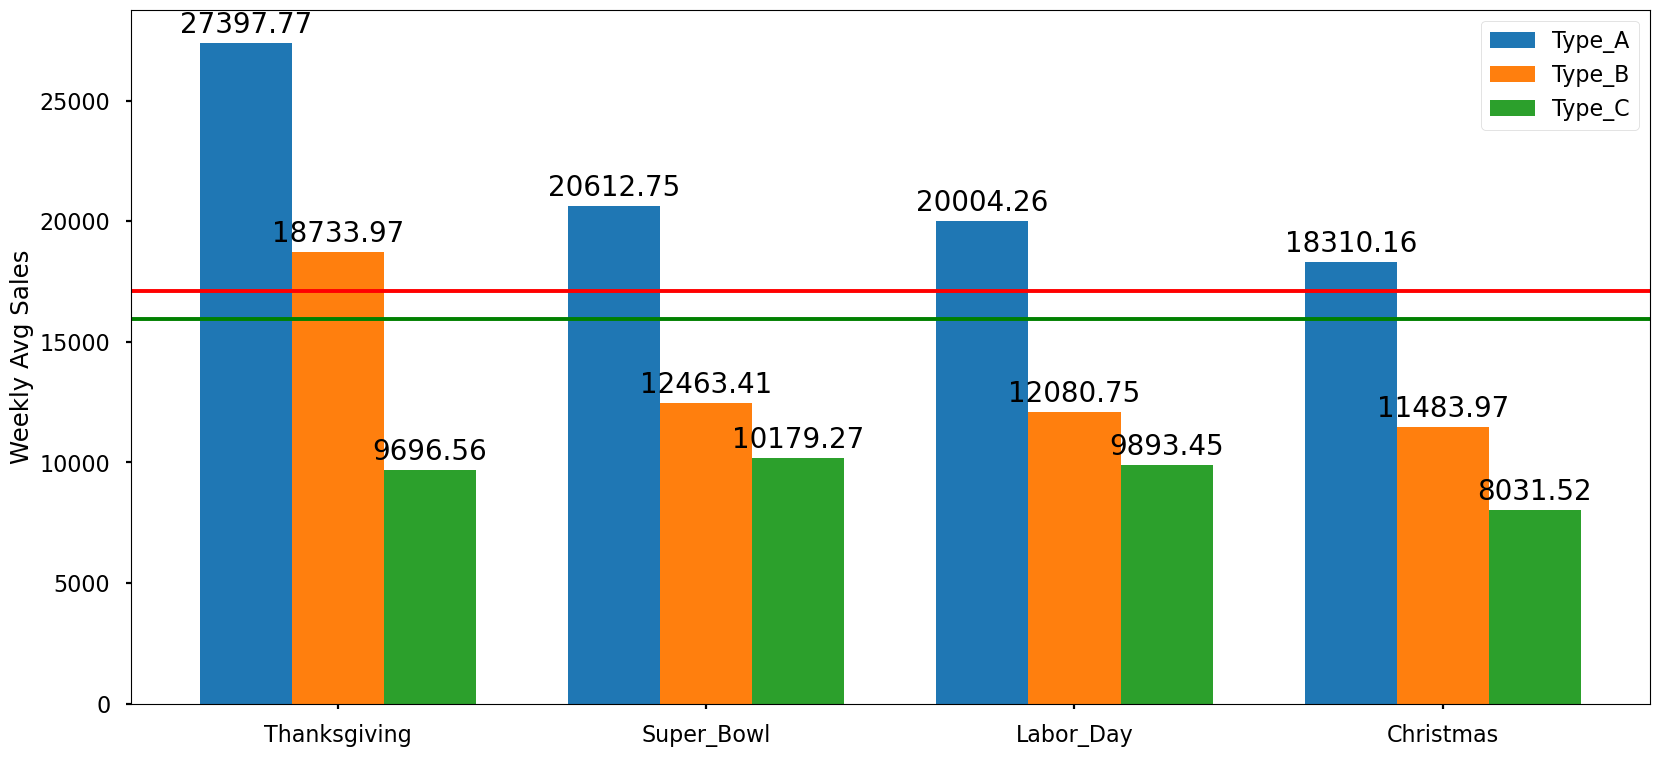

In [66]:
plt.style.use('seaborn-poster')
labels = ['Thanksgiving', 'Super_Bowl', 'Labor_Day', 'Christmas']
A_means = [27397.77, 20612.75, 20004.26, 18310.16]
B_means = [18733.97, 12463.41, 12080.75, 11483.97]
C_means = [9696.56,10179.27,9893.45,8031.52]

x = np.arange(len(labels))  
width = 0.25

fig, ax = plt.subplots(figsize=(17, 8))
rects1 = ax.bar(x - width, A_means, width, label='Type_A')
rects2 = ax.bar(x , B_means, width, label='Type_B')
rects3 = ax.bar(x + width, C_means, width, label='Type_C')

ax.set_ylabel('Weekly Avg Sales')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.axhline(y=17094.30,color='r') # holidays avg
plt.axhline(y=15952.82,color='green') # not-holiday avg

fig.tight_layout()

plt.show()


- The result shows that, highest sale average is in the Thanksgiving week between holidays. And, for all holidays Type A stores has highest sales.

In [67]:
dfdata.sort_values(by = "Weekly_Sales", ascending = False).head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,christmas
90645,10,72,2010-11-26,693099.36,True,55.33,3.162,NaN,NaN,NaN,NaN,NaN,126.669267,9.003,B,126512,False,False,True,False
337053,35,72,2011-11-25,649770.18,True,47.88,3.492,1333.24,NaN,58563.24,20.97,6386.86,140.421786,8.745,B,103681,False,False,True,False
94393,10,72,2011-11-25,630999.19,True,60.68,3.760,174.72,329.0,141630.61,79.00,1009.98,129.836400,7.874,B,126512,False,False,True,False
333594,35,72,2010-11-26,627962.93,True,46.67,3.039,NaN,NaN,NaN,NaN,NaN,136.689571,8.763,B,103681,False,False,True,False
131088,14,72,2010-11-26,474330.10,True,46.15,3.039,NaN,NaN,NaN,NaN,NaN,182.783277,8.724,A,200898,False,False,True,False


- The result shows that  top 5 highest weekly sales are belongs to Thanksgiving weeks.

## TO SEE THE SIZE - TYPE RELATION

In [68]:
dfdata_store.groupby("Type").describe()["Size"].round(2)

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
A,22.0,177247.73,49392.62,39690.0,155840.75,202406.0,203819.0,219622.0
B,17.0,101190.71,32371.14,34875.0,93188.00,114533.0,123737.0,140167.0
C,6.0,40541.67,1304.15,39690.0,39745.00,39910.0,40774.0,42988.0


<AxesSubplot:xlabel='Type', ylabel='Size'>

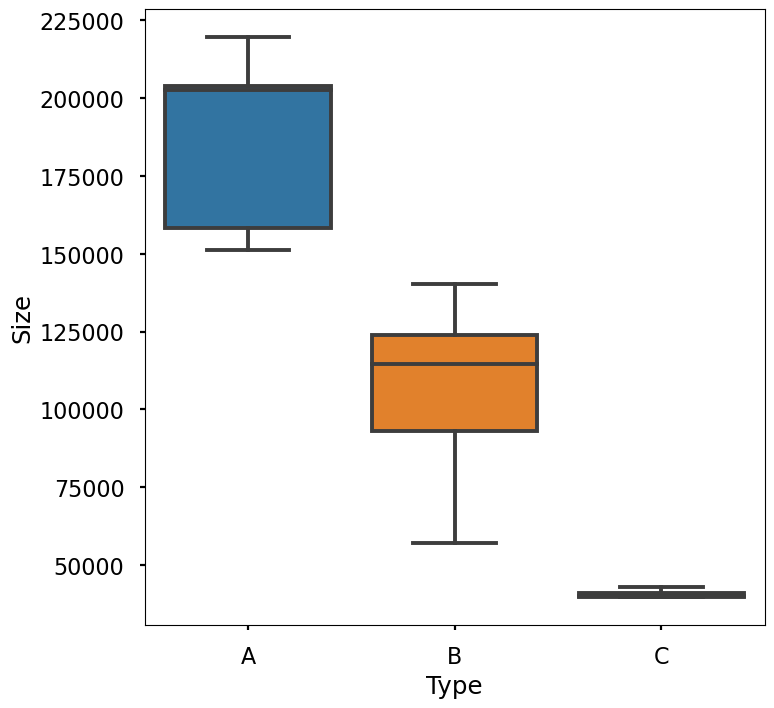

In [69]:
plt.figure(figsize=(8,8)) # To see the type-size re
sns.boxplot(x='Type', y='Size', data=dfdata, showfliers=False)

- Size of the type of stores are consistent with sales, as expected. Higher size stores has higher sales. And, Walmart classify stores according to their sizes according to graph. After the smallest size value of Type A, Type B begins. After the smallest size value of Type B, Type C begins.

## MARKDOWN COLLUMNS

In [70]:
dfdata.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270031
MarkDown2       309308
MarkDown3       283561
MarkDown4       285694
MarkDown5       269283
CPI                  0
Unemployment         0
Type                 0
Size                 0
Super_Bowl           0
Labor_Day            0
Thanksgiving         0
christmas            0
dtype: int64

In [71]:
dfdata = dfdata.fillna(0)

In [72]:
dfdata.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Super_Bowl      0
Labor_Day       0
Thanksgiving    0
christmas       0
dtype: int64

In [73]:
dfdata.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000
mean,22.195611,44.241309,16033.114591,60.090599,3.360890,2590.323565,878.905242,468.845949,1083.534361,1662.805002,171.212496,7.960000,136749.732787
std,12.787236,30.508819,22729.492116,18.447857,0.458519,6053.415601,5076.928566,5534.069859,3896.068938,4206.209357,39.162445,1.863879,60993.084568
min,1.000000,1.000000,0.010000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2120.130000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7661.700000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.350989,7.866000,140167.000000
75%,33.000000,74.000000,20271.265000,74.280000,3.738000,2809.050000,2.400000,4.540000,425.290000,2168.040000,212.445487,8.567000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


- Minimum value for weekly sales is 0.01. Most probably, this value is not true but I prefer not to change them now. Because, there are many departments and many stores. It takes too much time to check each department for each store (45 store for 81 departments). So, I take averages for EDA

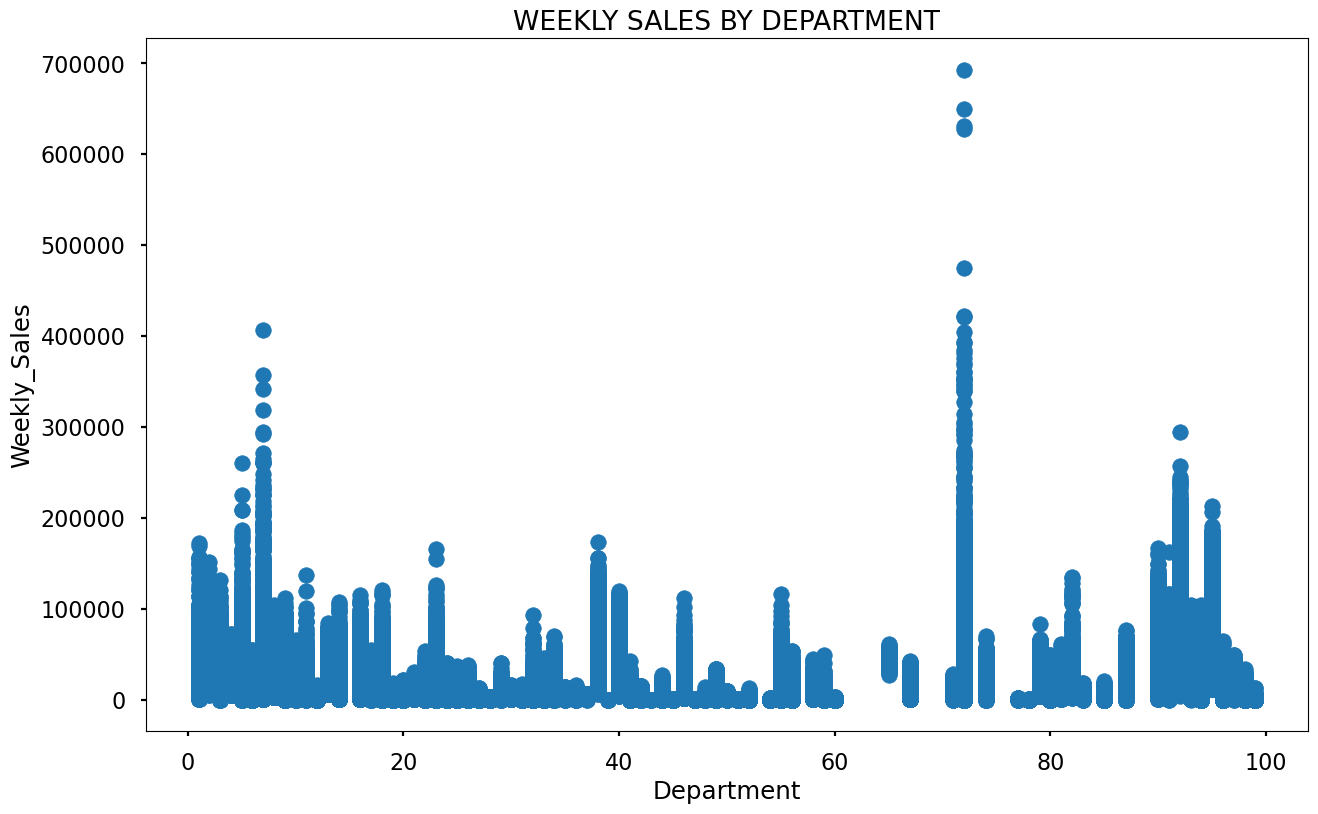

In [74]:
plt.figure(figsize = (15,9))
plt.scatter(x = dfdata["Dept"], y = dfdata["Weekly_Sales"])
plt.title("WEEKLY SALES BY DEPARTMENT")
plt.xlabel("Department")
plt.ylabel("Weekly_Sales")
plt.show()

<AxesSubplot:xlabel='Dept', ylabel='Weekly_Sales'>

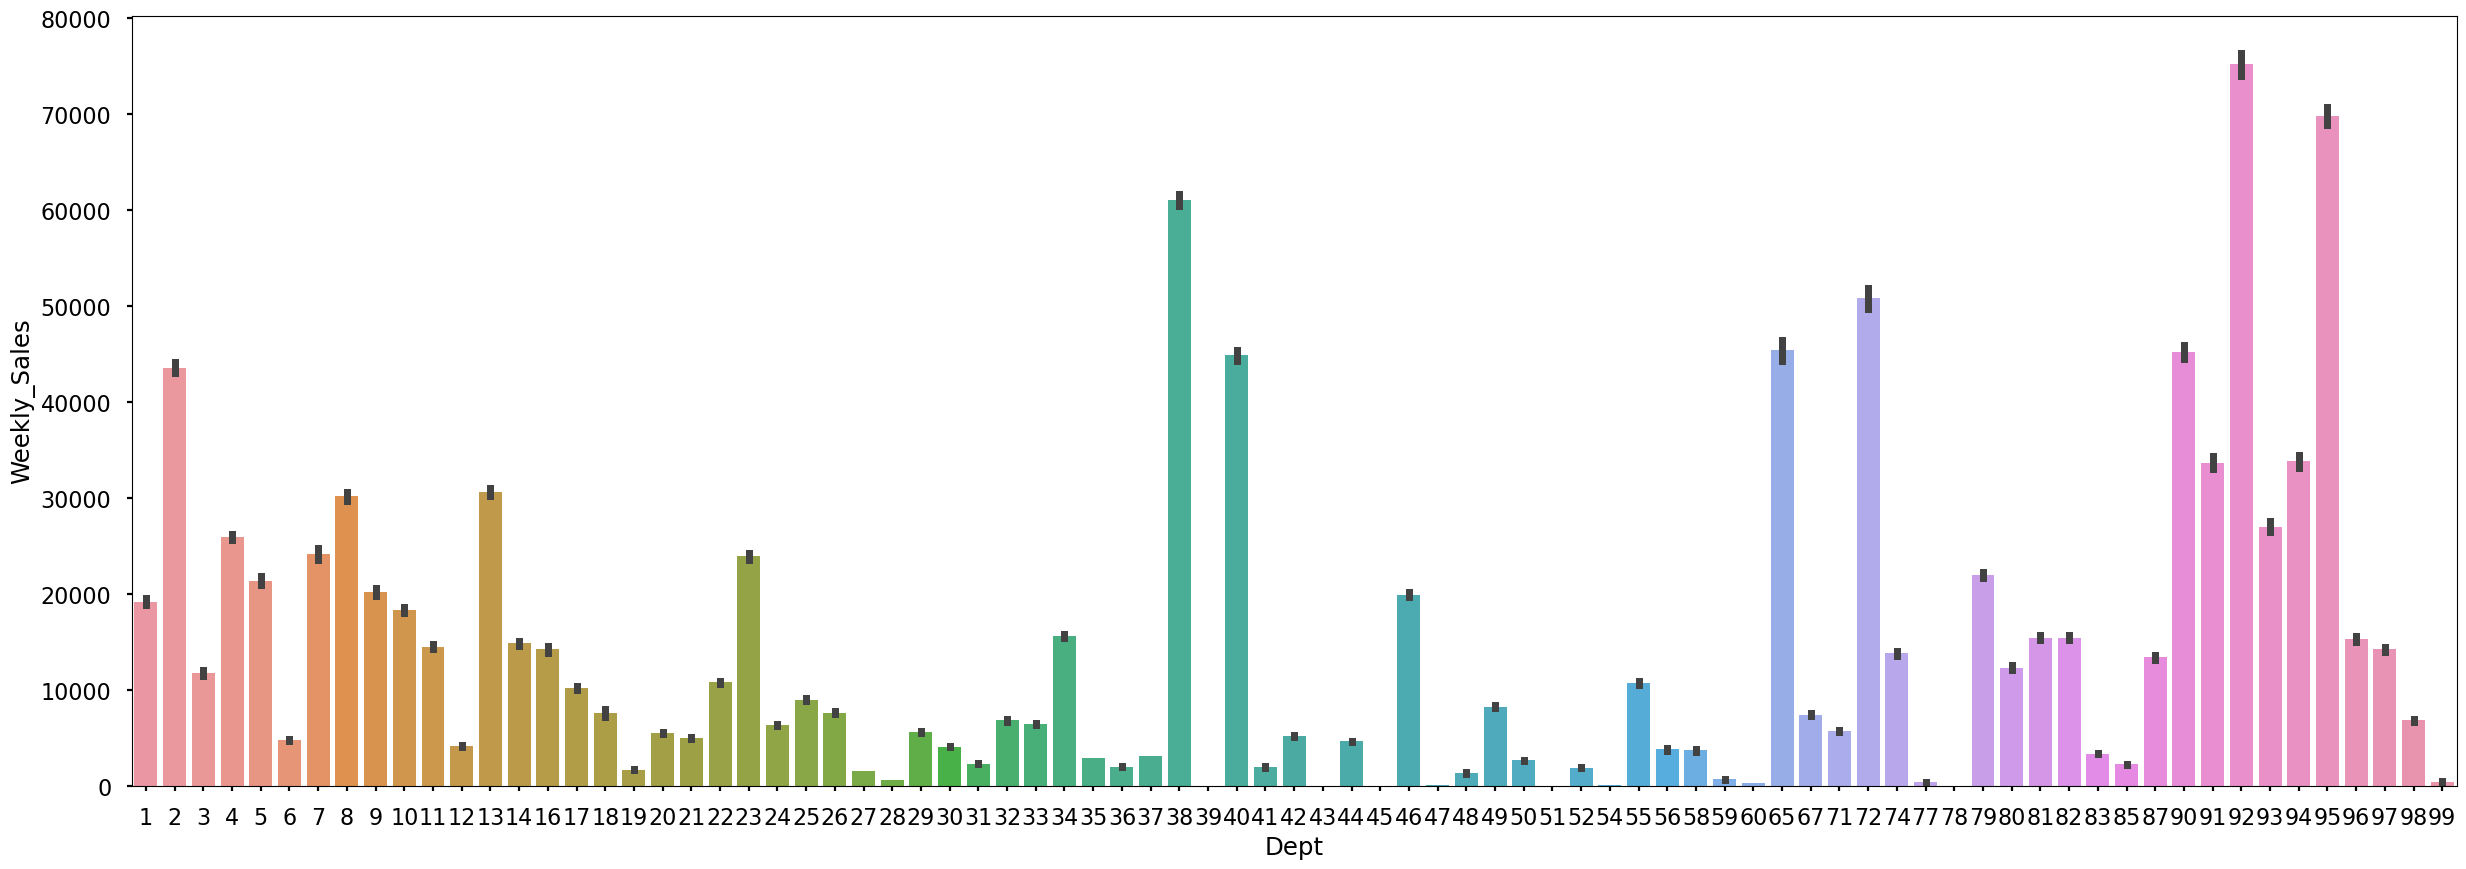

In [75]:
plt.figure(figsize=(30,10))
sns.barplot(x = dfdata["Dept"], y = dfdata["Weekly_Sales"])

- From the first graph, it is seen that one department between 60-80(I assume it is 72), has higher sales values. But, when we take the averages, it is seen that department 92 has higher mean sales. Department 72 is seasonal department, I think. It has higher values is some seasons but on average 92 is higher

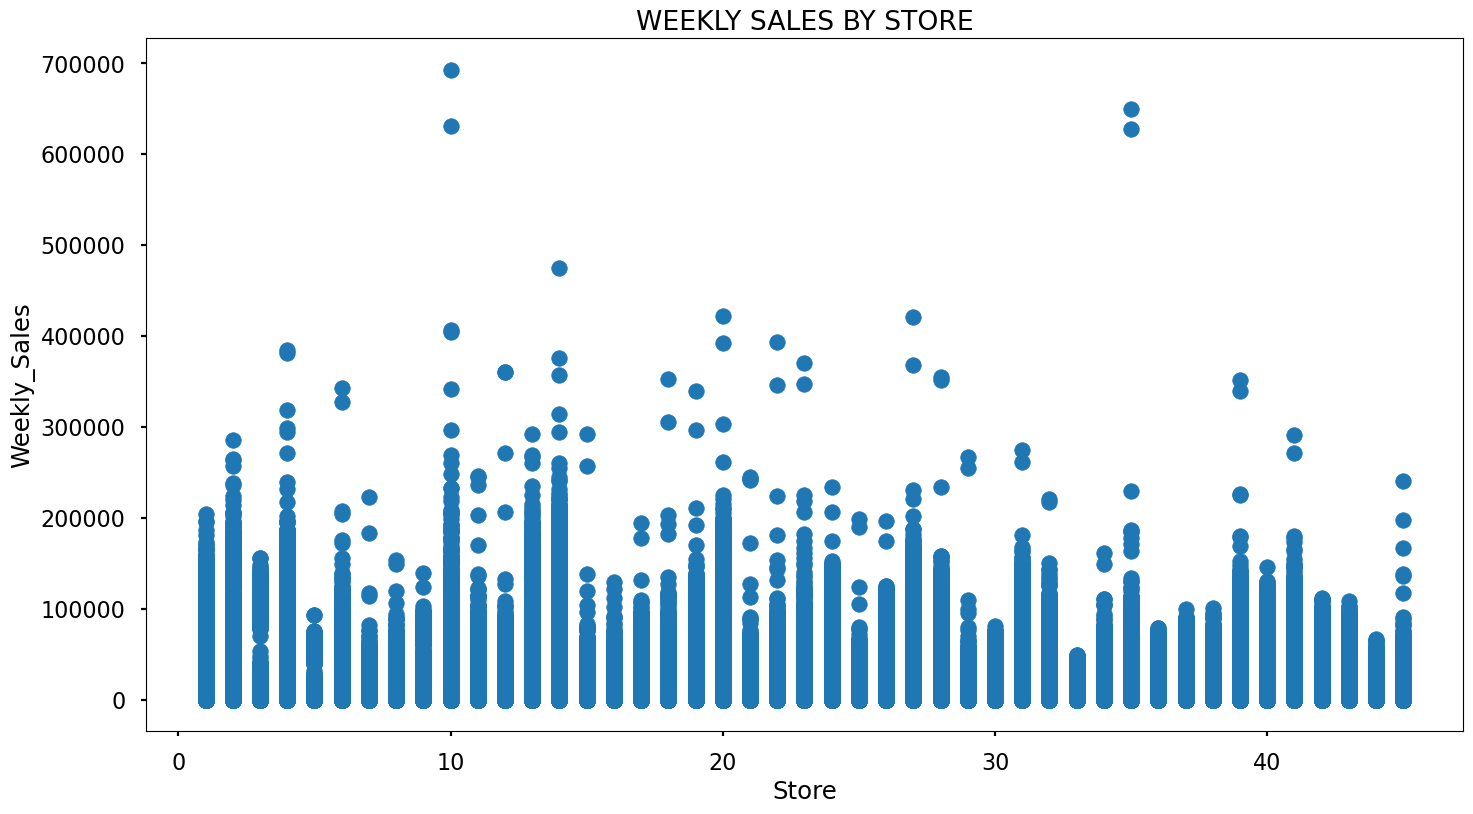

In [76]:
plt.figure(figsize = (17,9))
plt.scatter(x = dfdata["Store"], y = dfdata["Weekly_Sales"])
plt.title("WEEKLY SALES BY STORE")
plt.xlabel("Store")
plt.ylabel("Weekly_Sales")
plt.show()

<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

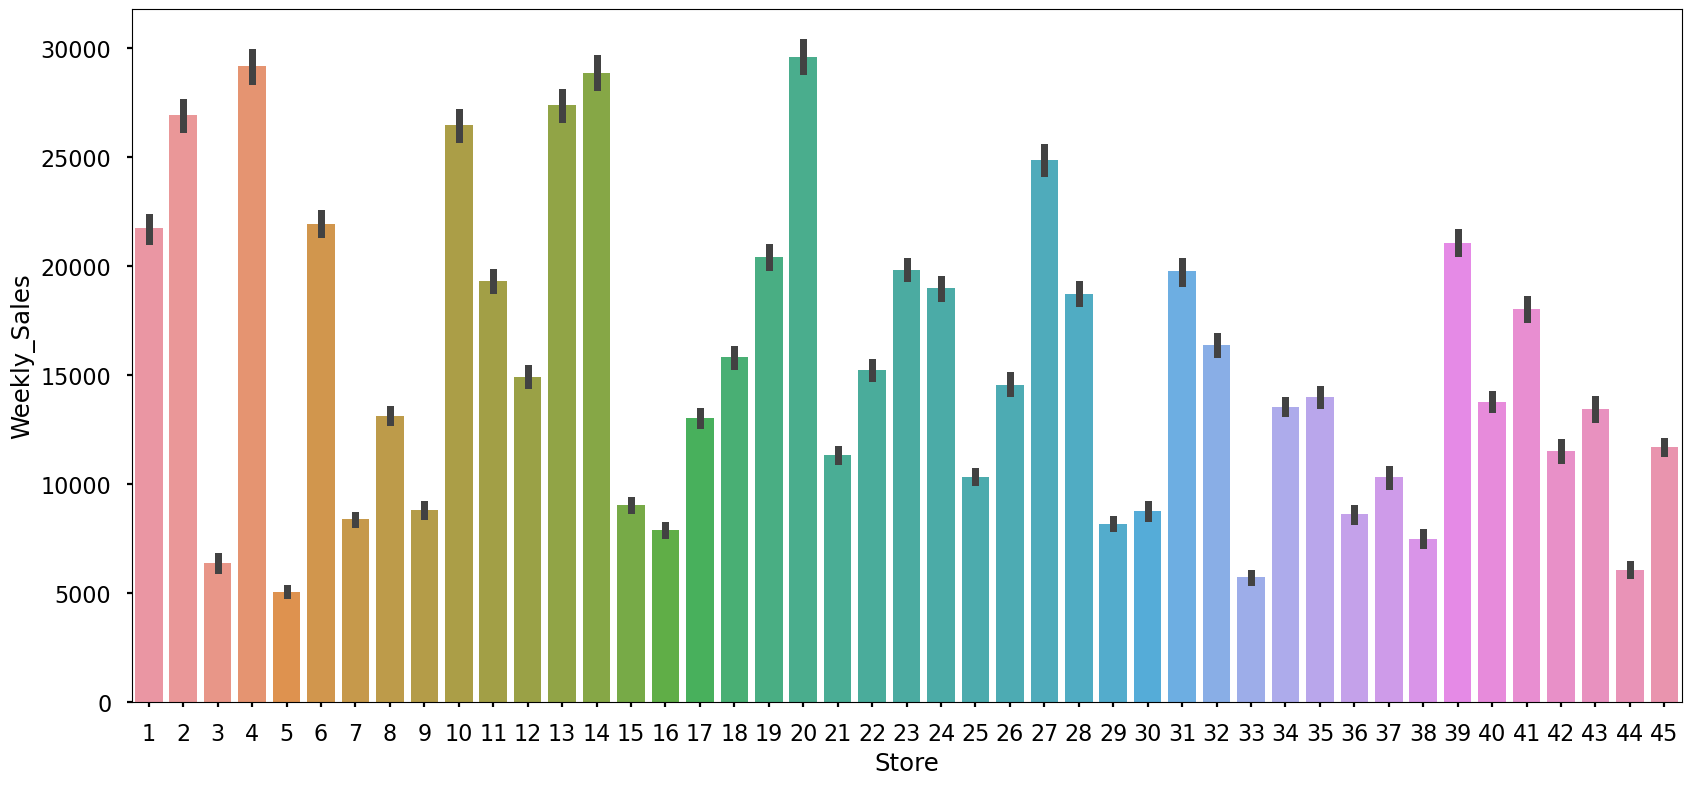

In [77]:
plt.figure(figsize = (20, 9))
sns.barplot(x = dfdata["Store"], y = dfdata["Weekly_Sales"])

- Same thing happens in stores. From the first graph, some stores has higher sales but on average store 20 is the best and 4 and 14 following it.

## CREATING NEW COLUMNS

In [78]:
dfdata["Date"] = pd.to_datetime(dfdata["Date"])   # convert to datetime
dfdata["week"] = dfdata["Date"].dt.week
dfdata["month"] = dfdata["Date"].dt.month
dfdata["year"] = dfdata["Date"].dt.year

In [79]:
dfdata.groupby("month")["Weekly_Sales"].mean()   # to see the best months for sales

month
1     14182.239153
2     16048.701191
3     15464.817698
4     15696.435193
5     15845.556200
6     16397.605478
7     15905.472425
8     16113.800069
9     15147.216063
10    15279.182119
11    17534.964277
12    19425.798603
Name: Weekly_Sales, dtype: float64

In [80]:
dfdata.groupby("year")["Weekly_Sales"].mean()           # to see the best years for sales

year
2010    16318.648285
2011    16007.797985
2012    15748.265005
Name: Weekly_Sales, dtype: float64

In [81]:
monthly_Sales = pd.pivot_table(dfdata, values = "Weekly_Sales", columns = "year", index = "month")

In [82]:
monthly_Sales

year,2010,2011,2012
month,,,
1,NaN,14054.378885,14308.409638
2,16123.339183,15906.833033,16114.205186
3,15480.222209,15245.219561,15626.987004
4,15786.479121,15403.855679,15948.226550
5,16063.976174,15425.362450,16050.428765
6,16551.606753,16267.355096,16379.278462
7,16009.268745,15774.614002,15939.415690
8,16205.333619,16088.169620,16062.301274
9,15172.175282,15018.049242,15283.248527


<AxesSubplot:xlabel='month'>

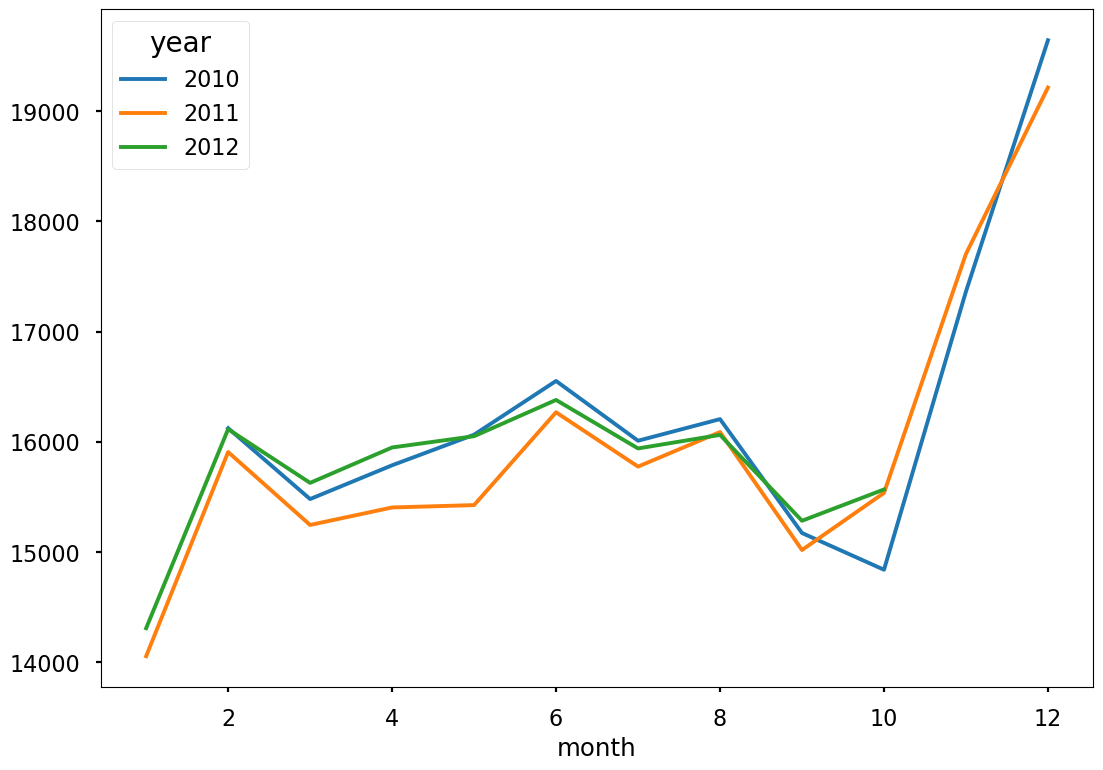

In [83]:
monthly_Sales.plot()

- From the graph, it is seen that 2011 has lower sales than 2010 generally. When we look at the mean sales it is seen that 2010 has higher values, but 2012 has no information about November and December which have higher sales. Despite of 2012 has no last two months sales, it's mean is near to 2010. Most probably, it will take the first place if we get 2012 results and add them.

<AxesSubplot:xlabel='month', ylabel='Weekly_Sales'>

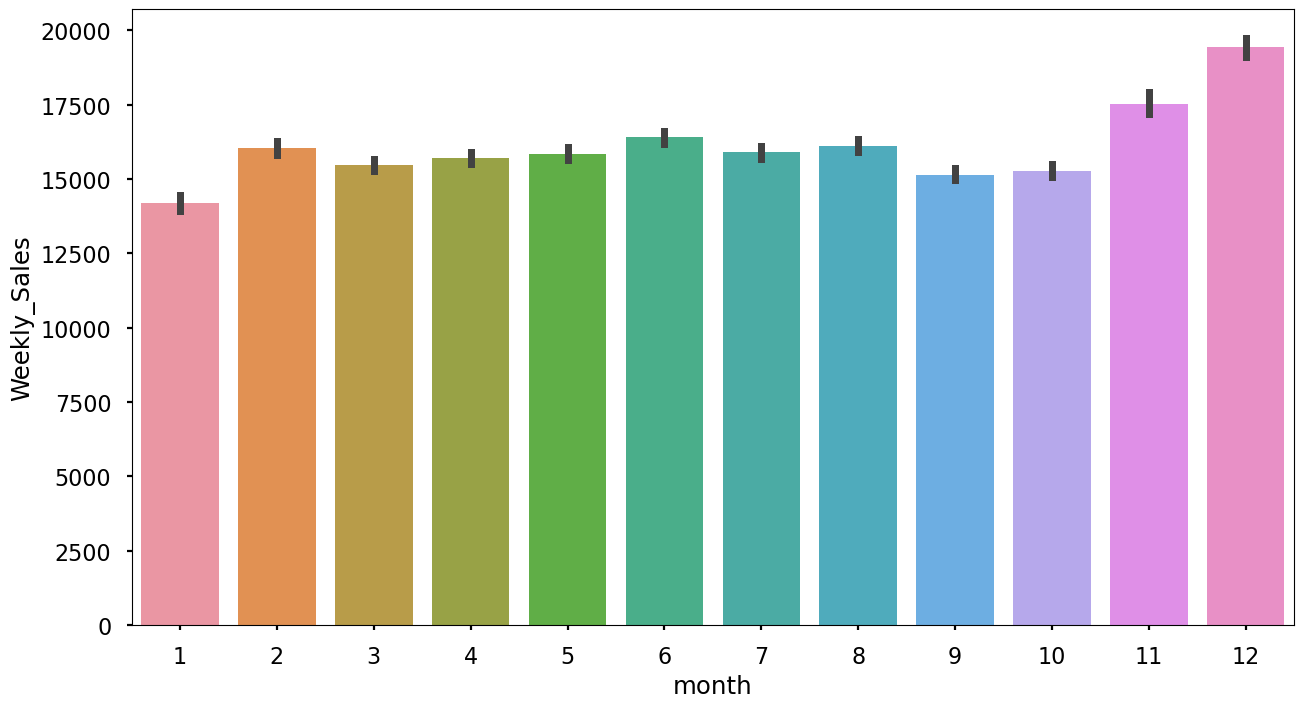

In [84]:
plt.figure(figsize = (15, 8))
sns.barplot(x = "month", y = "Weekly_Sales", data = dfdata)

- When we look at the graph above, the best sales are in December and November, as expected. The highest values are belongs to Thankgiving holiday but when we take average it is obvious that December has the best value

In [85]:
dfdata.groupby("month")["Weekly_Sales"].mean().sort_values(ascending = False).head()

month
12    19425.798603
11    17534.964277
6     16397.605478
8     16113.800069
2     16048.701191
Name: Weekly_Sales, dtype: float64

-  the above result shows that Top 5 sales averages by weekly belongs to 1-2 weeks before Christmas, Thanksgiving, Black Friday and end of May, when the schools are closed.

In [86]:
wekly_sales = pd.pivot_table(dfdata, values = "Weekly_Sales", columns = "year", index = "week")

In [87]:
wekly_sales

year,2010,2011,2012
week,,,
1,NaN,14679.587323,15172.381502
2,NaN,13948.508567,14240.431552
3,NaN,13985.160065,14279.630241
4,NaN,13603.701992,13535.547791
5,16887.602166,15822.286850,15511.884823
6,16390.912208,16155.910205,16703.472478
7,16255.185970,16558.869701,16738.021167
8,14955.932194,15085.818752,15489.637807
9,15964.821240,15947.340322,15693.684826


<AxesSubplot:xlabel='week'>

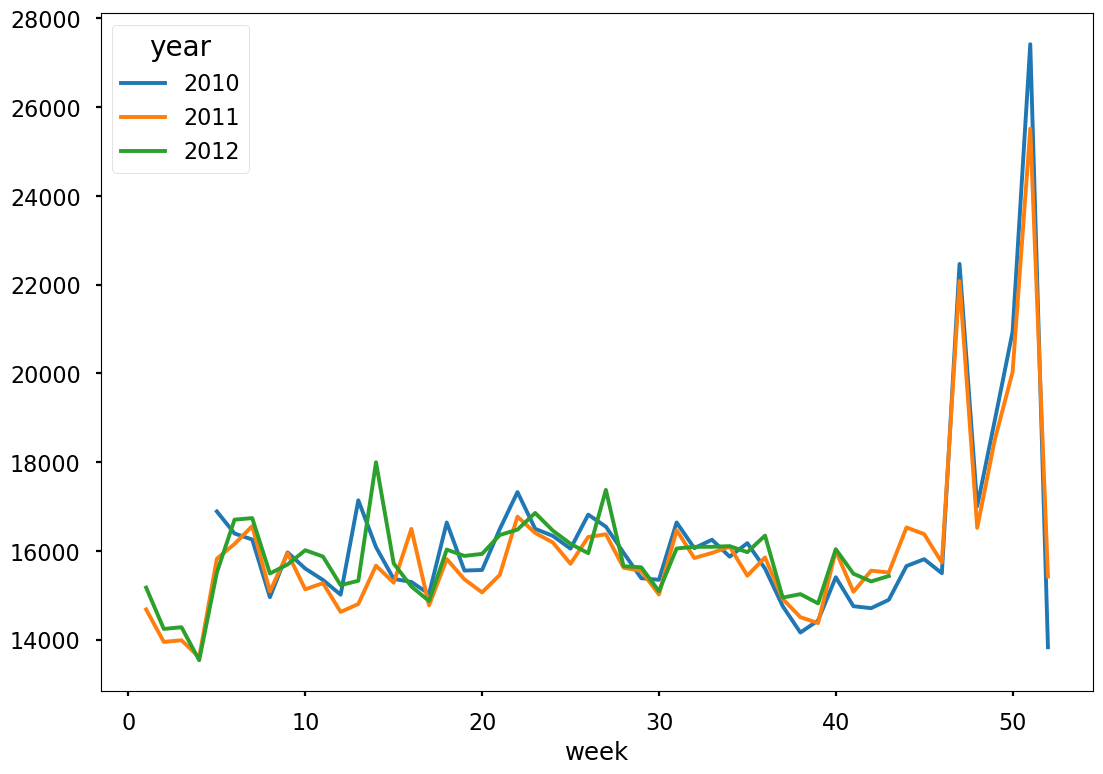

In [88]:
wekly_sales.plot()

<AxesSubplot:xlabel='week', ylabel='Weekly_Sales'>

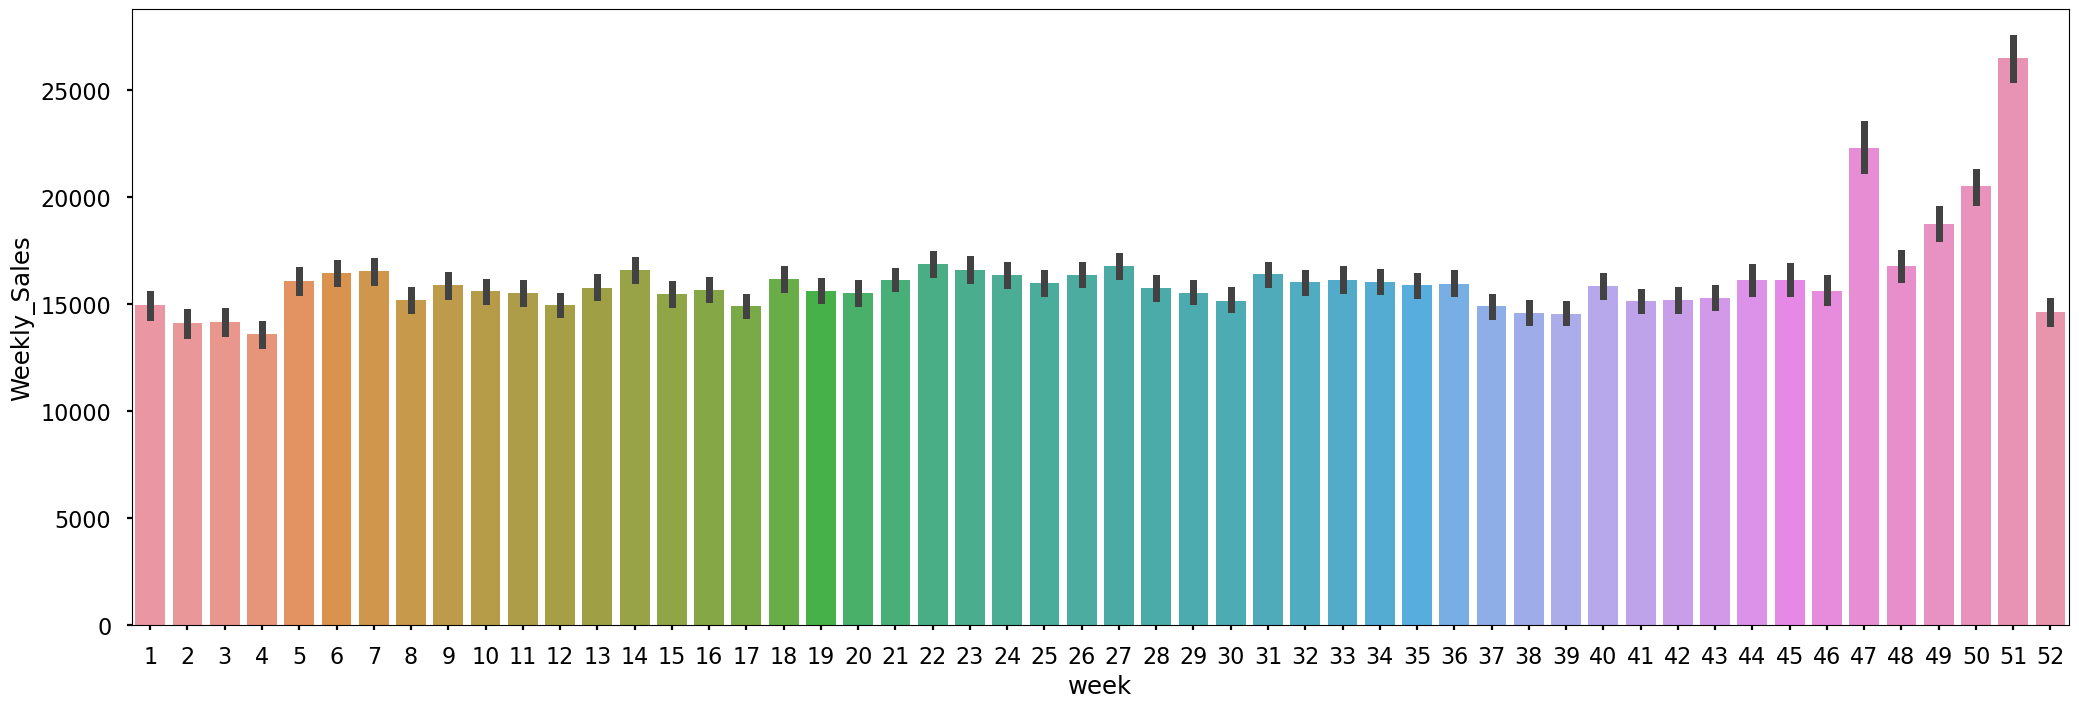

In [89]:
plt.figure(figsize = (25, 8))
sns.barplot(x = "week", y= "Weekly_Sales", data = dfdata)

- the result shows that, it is seen that 51th week and 47th weeks have significantly higher averages as Christmas, Thankgiving and Black Friday effects.

## FUEL PRICE ,CPI, UNEMPLOYMENT, TEMPERATURE EFFECTS 

In [90]:
fuel_price = pd.pivot_table(dfdata, values = "Weekly_Sales", index = "Fuel_Price")

In [91]:
fuel_price


,Weekly_Sales
Fuel_Price,
2.472,12375.816579
2.513,9654.919556
2.514,15704.146729
2.520,11474.857436
2.533,10268.915476
...,...
4.294,14517.017901
4.301,14258.181950
4.308,16139.939576


<AxesSubplot:xlabel='Fuel_Price'>

<Figure size 500x900 with 0 Axes>

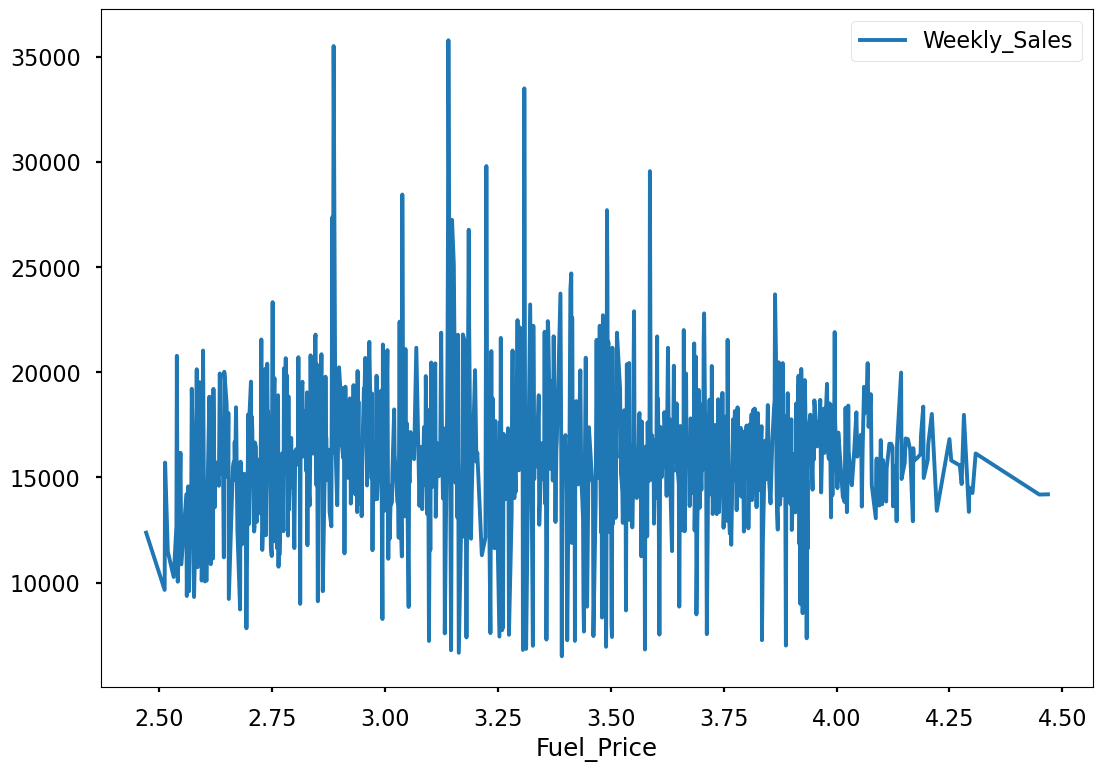

In [92]:
plt.figure(figsize =(5,9))
fuel_price.plot()

In [93]:
temperature = pd.pivot_table(dfdata, values = "Weekly_Sales", index = "Temperature")

In [94]:
temperature

,Weekly_Sales
Temperature,
-2.06,8329.033881
5.54,12021.840294
6.23,15927.781029
7.46,8606.890725
9.51,11084.434714
...,...
99.20,5199.964348
99.22,13225.002703
99.66,4939.496250


<AxesSubplot:xlabel='Temperature'>

<Figure size 1600x900 with 0 Axes>

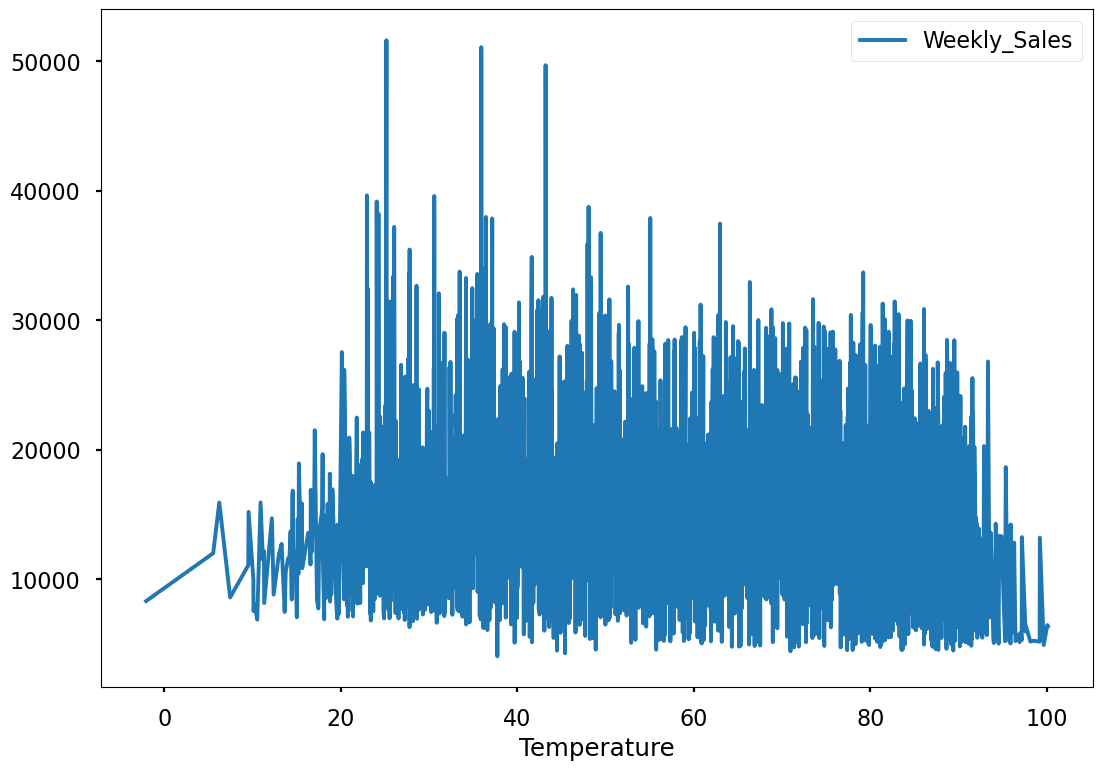

In [95]:
plt.figure(figsize =(16,9))
temperature.plot()

In [96]:
cpi_table = pd.pivot_table(dfdata, values = "Weekly_Sales", index = "CPI")

In [97]:
cpi_table

,Weekly_Sales
CPI,
126.064000,16523.895288
126.076645,16548.663049
126.085452,17236.237478
126.089290,15630.551924
126.101935,16809.630485
...,...
227.018417,13047.967391
227.036936,12738.163429
227.169392,8864.520635


<AxesSubplot:xlabel='CPI'>

<Figure size 1000x900 with 0 Axes>

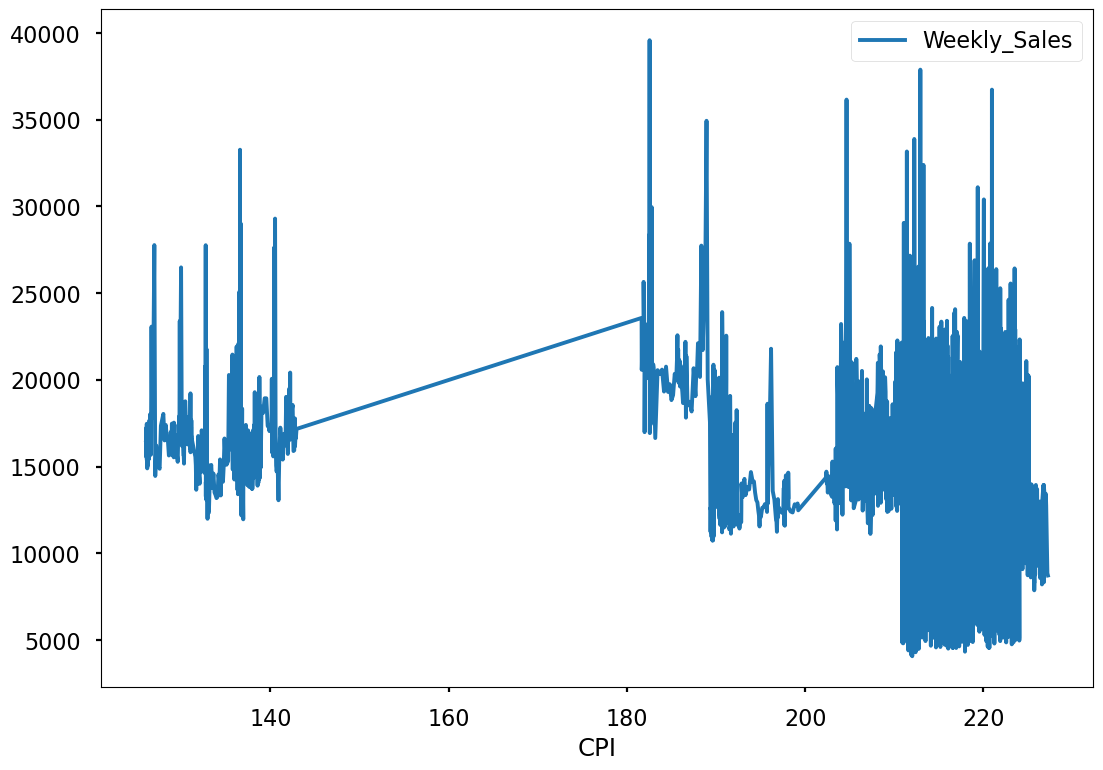

In [98]:
plt.figure(figsize =(10,9))
cpi_table.plot()

In [99]:
unemployment_table = pd.pivot_table(dfdata, values= "Weekly_Sales", index = "Unemployment")

In [100]:
unemployment_table

,Weekly_Sales
Unemployment,
3.879,29929.347770
4.077,29634.107100
4.125,17114.420855
4.145,16866.943915
4.156,17392.234785
...,...
13.975,14993.528642
14.021,14293.876902
14.099,14133.220398


<AxesSubplot:xlabel='Unemployment'>

<Figure size 1000x800 with 0 Axes>

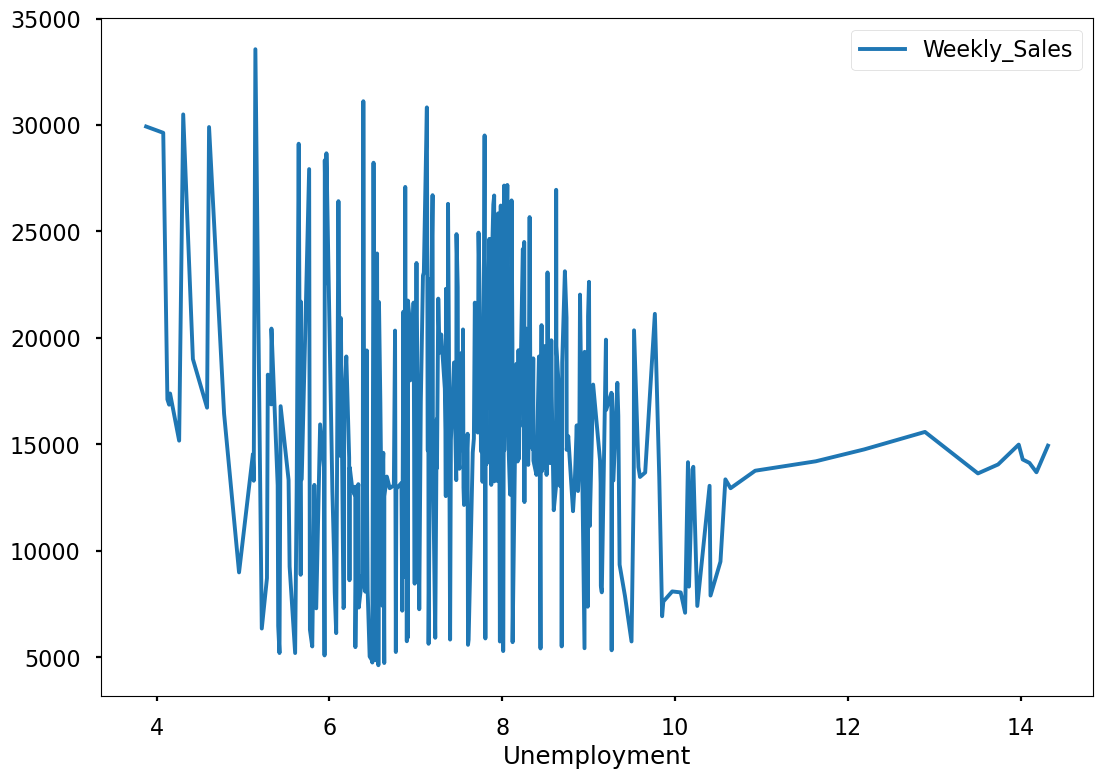

In [101]:
plt.figure(figsize = (10,8))
unemployment_table.plot()

- the above result shows, it is seen that there are no significant patterns between CPI, temperature, unemployment rate, fuel price vs weekly sales. There is no data for CPI between 140-180 also.

In [102]:
dfdata.to_csv("Clean_data.csv")     # assign new data frame to csv for using after here

## APPLYING MACHINE LEARNING MODELS

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression 
from sklearn import preprocessing

In [104]:
import warnings
warnings.filterwarnings("ignore")

In [105]:
pd.options.display.max_columns = 100

In [106]:
df_data = pd.read_csv("clean_data.csv")

In [107]:
df_data.head(5)

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,christmas,week,month,year
0,0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
1,1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
2,2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
3,3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
4,4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010


In [108]:
df_data.drop(columns = "Unnamed: 0", axis = 1, inplace = True)

In [109]:
df_data["Date"] = pd.to_datetime(df_data["Date"])    # changing datetime to divide if needs

In [110]:
df_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,christmas,week,month,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010


## ENCODING THE DATA

- For preprocessing our data, I will change holidays boolean values to 0-1 and replace type of the stores from A, B, C to 1, 2, 3.

In [111]:
df_encode = df_data.copy()

In [112]:
type_group = {'A':1, 'B': 2, 'C': 3}  # changing A,B,C to 1-2-3
df_encode['Type'] = df_encode['Type'].replace(type_group)

In [113]:
df_encode['Super_Bowl'] = df_encode['Super_Bowl'].astype(bool).astype(int) # changing T,F to 0-1

In [114]:
df_encode['Thanksgiving'] = df_encode['Thanksgiving'].astype(bool).astype(int) # changing T,F to 0-1

In [115]:
df_encode['Labor_Day'] = df_encode['Labor_Day'].astype(bool).astype(int)

In [116]:
df_encode['Christmas'] = df_encode['christmas'].astype(bool).astype(int)

In [117]:
df_encode['IsHoliday'] = df_encode['IsHoliday'].astype(bool).astype(int)

In [118]:
df_data_new = df_encode.copy()

In [119]:
df_data_new.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,christmas,week,month,year,Christmas
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,0,0,0,False,5,2,2010,0
1,1,2,2010-02-05,50605.27,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,0,0,0,False,5,2,2010,0
2,1,3,2010-02-05,13740.12,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,0,0,0,False,5,2,2010,0
3,1,4,2010-02-05,39954.04,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,0,0,0,False,5,2,2010,0
4,1,5,2010-02-05,32229.38,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,0,0,0,False,5,2,2010,0


In [120]:
drop_column = ["Super_Bowl", "Thanksgiving", "Christmas", "Labor_Day"]

In [121]:
df_data_new.drop(drop_column, axis = 1, inplace = True)

<AxesSubplot:>

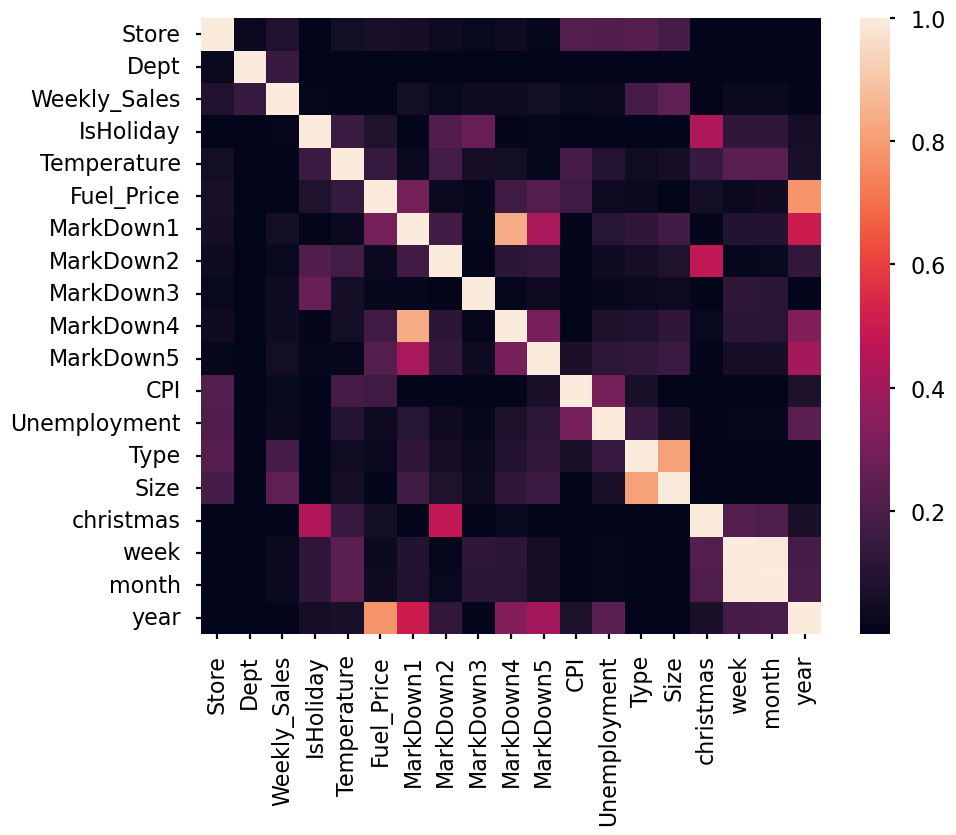

In [122]:
plt.figure(figsize = (10,8))
sns.heatmap(df_data_new.corr().abs())

- Temperature, unemployment, CPI have no significant effect on weekly sales, so I will drop them. Also, Markdown 4 and 5 highly correlated with Markdown 1. So, I will drop them also. It can create multicollinearity problem, maybe. So, first I will try without them.

In [123]:
drop_coll = ['Temperature','MarkDown4','MarkDown5','CPI','Unemployment']
df_data_new.drop(drop_coll, axis=1, inplace=True)

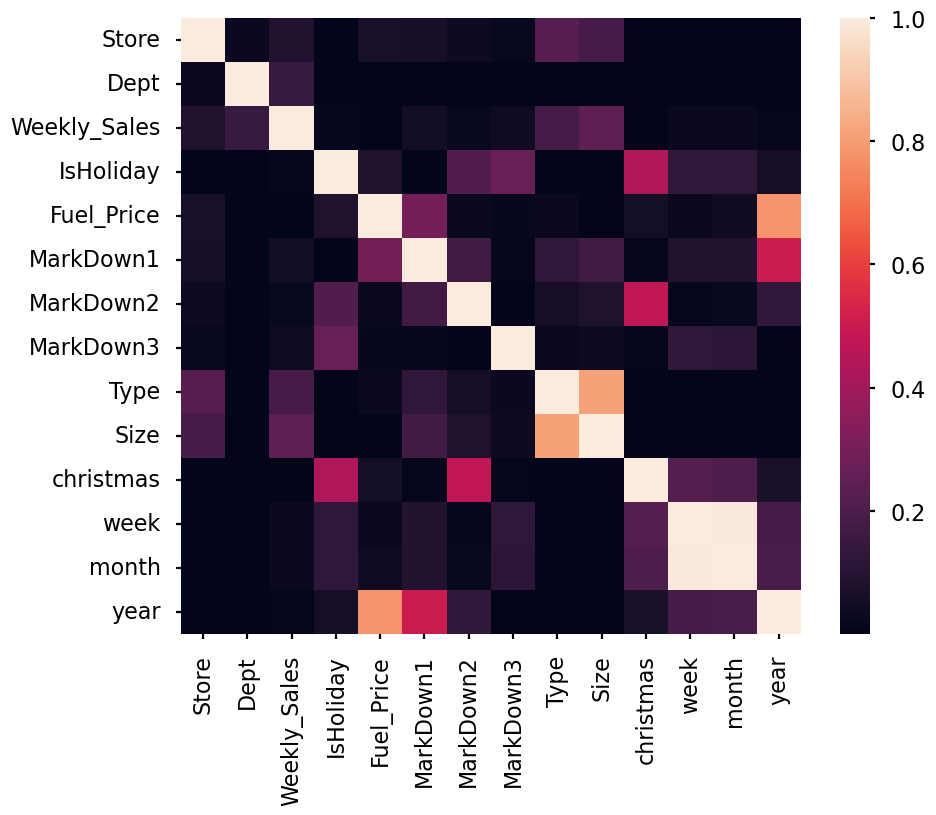

In [124]:
plt.figure(figsize = (10,8))                                  # To see the correlations without dropping columns
sns.heatmap(df_data_new.corr().abs())
plt.show() 

- Size and type are highly correlated with weekly sales. Also, department and store are correlated with sales.

In [125]:
df_data_new = df_data_new.sort_values(by = "Date", ascending = True)

## Applying TRAIN-TEST-SPLIT

In [126]:
import itertools
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

In [127]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller, acf, pacf
from pmdarima.utils import decomposed_plot
from pmdarima.arima import decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima import auto_arima

In [128]:
from statsmodels.tsa.seasonal import seasonal_decompose as season
from sklearn.model_selection import cross_val_score

from statsmodels.tsa.seasonal import seasonal_decompose as season
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, balanced_accuracy_score

In [129]:
train_data = df_data_new[:int(0.7*(len(df_data_new)))] 
test_data = df_data_new[int(0.7*(len(df_data_new))):] 

target = "Weekly_Sales"
used_cols = [w for w in df_data_new.columns.to_list() if w not in [target]] # all columns except weekly sales

x_train = train_data[used_cols]
x_test = test_data[used_cols]
y_train = train_data[target]
y_test = test_data[target]

In [130]:
X = df_data_new[used_cols] 


In [131]:
x_train = x_train.drop(columns = ["Date"], axis = 1) # dropping date from train
x_test = x_test.drop(columns = ['Date'], axis=1)

## Metric Definition Function


In [132]:
def wmae_test(test, pred):                                                          # WMAE for test 
    weights = x_test['IsHoliday'].apply(lambda is_holiday:5 if is_holiday else 1)
    error = np.sum(weights * np.abs(test - pred), axis=0) / np.sum(weights)
    return error

## APPLYING RANDOM FOREST REGRESSION 

In [133]:
from sklearn.preprocessing import RobustScaler

In [134]:
robustscaler = RobustScaler()

In [135]:
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35,
                           max_features = 'sqrt',min_samples_split = 10)

In [136]:
#making pipe tp use scaler and regressor together
pipe = make_pipeline(robustscaler,rf)

In [137]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=35, max_features='sqrt',
                                       min_samples_split=10, n_estimators=50,
                                       n_jobs=-1, random_state=42))])

In [138]:
y_pred = pipe.predict(x_train)

In [139]:
y_pred

array([32576.29686344, 20100.98927602, 22654.64009287, ...,
       64415.77511725, 48430.06761698, 49247.78698905])

In [140]:
y_pred_test = pipe.predict(x_test)

In [141]:
y_pred_test

array([74100.96380291, 57809.2524939 , 59209.97158655, ...,
        7645.86766443,  6078.980212  ,  7663.87256721])

In [142]:
wmae_test(y_test, y_pred_test)

6080.770941698838

- For the first trial, my weighted error is around 6080.

## TO SEE FEATURE IMPORTANCE

In [143]:
X = X.drop(["Date"], axis = 1)

In [144]:
x

array([0, 1, 2, 3])

Feature ranking:
1. feature 1 (0.743138)
2. feature 8 (0.100036)
3. feature 0 (0.0522712)
4. feature 7 (0.0389137)
5. feature 10 (0.0202604)
6. feature 3 (0.0195358)
7. feature 11 (0.00913424)
8. feature 6 (0.00628103)
9. feature 4 (0.00301126)
10. feature 5 (0.00251718)
11. feature 2 (0.00199661)
12. feature 12 (0.00159997)
13. feature 9 (0.00130415)


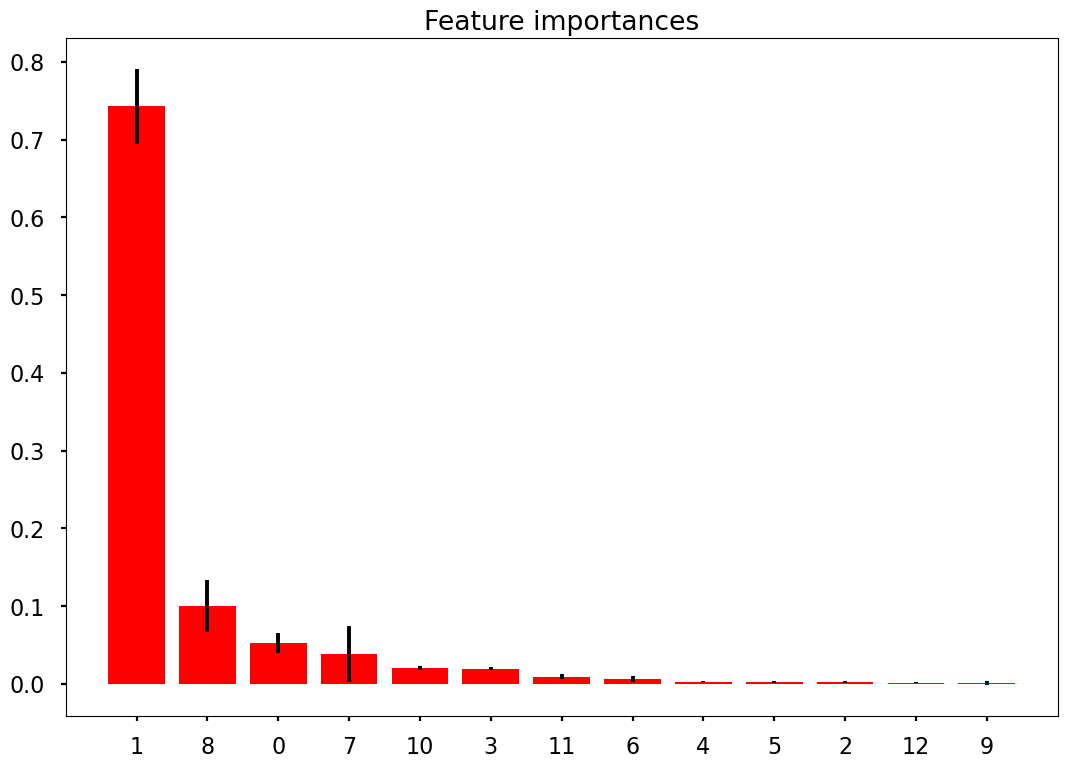

In [145]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for g in range(X.shape[1]):
    print("%d. feature %d (%g)" % (g + 1, indices[g], importances[indices[g]]))

# Plotting the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

- After looking feature importance, I dropped least important 3-4 features and tried the model. I found the best result when I dropped month column which is highly correlated with week.

In [146]:
X1_train = x_train.drop(['month'], axis=1) # dropping month
X1_test = x_test.drop(['month'], axis=1)

In [147]:
X1_train


,Store,Dept,IsHoliday,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,Type,Size,christmas,week,year
0,1,1,0,2.572,0.00,0.00,0.00,1,151315,False,5,2010
329781,35,3,0,2.784,0.00,0.00,0.00,2,103681,False,5,2010
329782,35,4,0,2.784,0.00,0.00,0.00,2,103681,False,5,2010
329783,35,5,0,2.784,0.00,0.00,0.00,2,103681,False,5,2010
329784,35,6,0,2.784,0.00,0.00,0.00,2,103681,False,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
94626,10,92,0,3.443,7737.75,38456.09,39.72,2,126512,False,1,2012
104671,11,96,0,3.157,5107.29,32305.30,144.66,1,207499,False,1,2012
104670,11,95,0,3.157,5107.29,32305.30,144.66,1,207499,False,1,2012
104669,11,94,0,3.157,5107.29,32305.30,144.66,1,207499,False,1,2012


In [148]:
X1_test

,Store,Dept,IsHoliday,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,Type,Size,christmas,week,year
104667,11,92,0,3.157,5107.29,32305.30,144.66,1,207499,False,1,2012
104666,11,91,0,3.157,5107.29,32305.30,144.66,1,207499,False,1,2012
104665,11,90,0,3.157,5107.29,32305.30,144.66,1,207499,False,1,2012
104664,11,87,0,3.157,5107.29,32305.30,144.66,1,207499,False,1,2012
104663,11,85,0,3.157,5107.29,32305.30,144.66,1,207499,False,1,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
329722,34,14,0,3.514,1151.88,68.01,3.00,1,158114,False,43,2012
329723,34,16,0,3.514,1151.88,68.01,3.00,1,158114,False,43,2012
329724,34,17,0,3.514,1151.88,68.01,3.00,1,158114,False,43,2012
329726,34,20,0,3.514,1151.88,68.01,3.00,1,158114,False,43,2012


## MODEL AGAIN WITHOUT MONTH

In [149]:
scaler=RobustScaler()

In [150]:
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35,
                           max_features = 'sqrt',min_samples_split = 10)


In [151]:
rfr = RandomForestRegressor(n_estimators = 50, random_state = 42, n_jobs = -1, max_depth = 35, max_features = "sqrt", min_samples_split= 10)

In [152]:
rfr

RandomForestRegressor(max_depth=35, max_features='sqrt', min_samples_split=10,
                      n_estimators=50, n_jobs=-1, random_state=42)

In [153]:
pipe = make_pipeline(scaler, rfr)

In [154]:
pipe

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=35, max_features='sqrt',
                                       min_samples_split=10, n_estimators=50,
                                       n_jobs=-1, random_state=42))])

In [155]:
pipe.fit(X1_train, y_train)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=35, max_features='sqrt',
                                       min_samples_split=10, n_estimators=50,
                                       n_jobs=-1, random_state=42))])

In [156]:
y_pred = pipe.predict(X1_train)

In [157]:
y_pred_test = pipe.predict(X1_test)

In [158]:
wmae_test(y_test, y_pred_test)

5870.068329884608

- It gives better results than baseline.

## MODEL WITH WHOLE DATA

- Now, I want to make sure that my model will learn from the columns which I dropped or not. So, I will apply my model to whole encoded data again.

In [159]:
train_data_enc = df_encode[:int(0.7*(len(df_encode)))]
test_data_enc = df_encode[:int(0.7*(len(df_encode))):]

target = "Weekly_Sales"
used_cols1 = [U for U in df_encode.columns.to_list() if U not in [target]] # all columns except price

x_train_enc = train_data_enc[used_cols1]
x_test_enc = test_data_enc[used_cols1]
y_train_enc = train_data_enc[target]
y_test_enc = test_data_enc[target]

In [160]:
X_enc = df_encode[used_cols1]

In [161]:
X_enc.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,christmas,week,month,year,Christmas
0,1,1,2010-02-05,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,0,0,0,False,5,2,2010,0
1,1,2,2010-02-05,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,0,0,0,False,5,2,2010,0
2,1,3,2010-02-05,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,0,0,0,False,5,2,2010,0
3,1,4,2010-02-05,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,0,0,0,False,5,2,2010,0
4,1,5,2010-02-05,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,0,0,0,False,5,2,2010,0


In [162]:
X_train_enc = x_train_enc.drop(['Date'], axis=1)
X_test_enc= x_test_enc.drop(['Date'], axis=1)

In [163]:
X_train_enc.head()

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,christmas,week,month,year,Christmas
0,1,1,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,0,0,0,False,5,2,2010,0
1,1,2,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,0,0,0,False,5,2,2010,0
2,1,3,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,0,0,0,False,5,2,2010,0
3,1,4,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,0,0,0,False,5,2,2010,0
4,1,5,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,0,0,0,False,5,2,2010,0


In [164]:
X_test_enc.head()

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,christmas,week,month,year,Christmas
0,1,1,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,0,0,0,False,5,2,2010,0
1,1,2,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,0,0,0,False,5,2,2010,0
2,1,3,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,0,0,0,False,5,2,2010,0
3,1,4,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,0,0,0,False,5,2,2010,0
4,1,5,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,0,0,0,False,5,2,2010,0


In [165]:
rfr =RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35,
                           max_features = 'sqrt',min_samples_split = 10)

In [166]:
robustscaler = RobustScaler()

In [167]:
pipe = make_pipeline(robustscaler,rfr)

In [168]:
pipe.fit(X_train_enc, y_train_enc)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=35, max_features='sqrt',
                                       min_samples_split=10, n_estimators=50,
                                       n_jobs=-1, random_state=42))])

In [169]:
y_pred_enc = pipe.predict(X_train_enc)

In [170]:
y_pred_enc

array([33283.23364327, 38892.42748783, 24479.85281368, ...,
        7285.75363563, 25622.39883341, 19496.53240597])

In [171]:
y_pred_test_enc = pipe.predict(X_test_enc)

In [172]:
y_pred_test_enc 

array([33283.23364327, 38892.42748783, 24479.85281368, ...,
        7285.75363563, 25622.39883341, 19496.53240597])

In [173]:
wmae_test(y_test_enc, y_pred_test_enc)

4747.063831483625

- We found better results for whole data, it means our model can learn from columns which I dropped before.



## Model with Dropping Month Column

- With the same dateset before, I try to model again without month column.

In [174]:
df_encod_new1 = df_encode.copy()

In [175]:
df_encod_new1 = df_encod_new1.drop(['Date'], axis=1)

In [176]:
df_encod_new1 = df_encod_new1.drop(['month'], axis=1)

In [177]:
train_data_enc_new1 = df_encod_new1[:int(0.7*(len(df_encod_new1)))]
test_data_enc_new1 = df_encod_new1[int(0.7*(len(df_encod_new1))):]

target = "Weekly_Sales"
used_cols3 = [c for c in df_encod_new1.columns.to_list() if c not in [target]] # all columns except price

X_train_enc2 = train_data_enc_new1[used_cols3]
X_test_enc2 = test_data_enc_new1[used_cols3]
y_train_enc2 = train_data_enc_new1[target]
y_test_enc2 = test_data_enc_new1[target]

In [178]:
pipe = make_pipeline(robustscaler,rfr)

In [179]:
pipe.fit(X_train_enc2, y_train_enc2)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=35, max_features='sqrt',
                                       min_samples_split=10, n_estimators=50,
                                       n_jobs=-1, random_state=42))])

In [180]:
y_pred_enc = pipe.predict(X_train_enc2)

In [181]:
y_pred_enc

array([31463.27204272, 37543.38711187, 24101.62412623, ...,
        7099.4710481 , 27698.4485804 , 22002.19682766])

In [182]:
y_pred_test_enc = pipe.predict(X_test_enc2)

In [183]:
y_pred_test_enc

array([23068.29917   , 22619.63768868, 22750.70844253, ...,
       29127.36050439, 11132.94061047,  9877.87804199])

In [184]:
pipe.score(X_test_enc2,y_test_enc2)

0.6329293839965726

In [185]:
wmae_test(y_test_enc2, y_pred_test_enc)

2461.342011980871

- I found best results with doing feature selection from whole encoded dataset.

In [186]:
df_results = pd.DataFrame(columns=["Model", "Info",'WMAE'])

In [187]:
df_results = df_results.append({     
     "Model": 'RandomForestRegressor' ,
      "Info": 'w/out divided holiday columns' , 
       'WMAE' : 5850}, ignore_index=True)

In [188]:
df_results = df_results.append({     
     "Model": 'RandomForestRegressor' ,
      "Info": 'w/out month column' , 
       'WMAE' : 6080}, ignore_index=True)
df_results = df_results.append({     
     "Model": 'RandomForestRegressor' ,
      "Info": 'whole data' , 
       'WMAE' : 5870}, ignore_index=True)
df_results = df_results.append({     
     "Model": 'RandomForestRegressor' ,
      "Info": 'whole data with feature selection' , 
       'WMAE' : 4747}, ignore_index=True)
df_results = df_results.append({     
     "Model": 'RandomForestRegressor' ,
      "Info": 'whole data with feature selection w/out month' , 
       'WMAE' : 2461}, ignore_index=True)


In [189]:
df_results

,Model,Info,WMAE
0,RandomForestRegressor,w/out divided holiday columns,5850
1,RandomForestRegressor,w/out month column,6080
2,RandomForestRegressor,whole data,5870
3,RandomForestRegressor,whole data with feature selection,4747
4,RandomForestRegressor,whole data with feature selection w/out month,2461


- The best results belongs to whole data set with feature selection. Now, I will try time series models.

## TIME SERIES MODELS

In [190]:
dfdata.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,christmas,week,month,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010


In [191]:
dfdata["Date"] = pd.to_datetime(dfdata["Date"])

In [192]:
dfdata.set_index('Date', inplace=True)

##   PLOTTING THE SALES

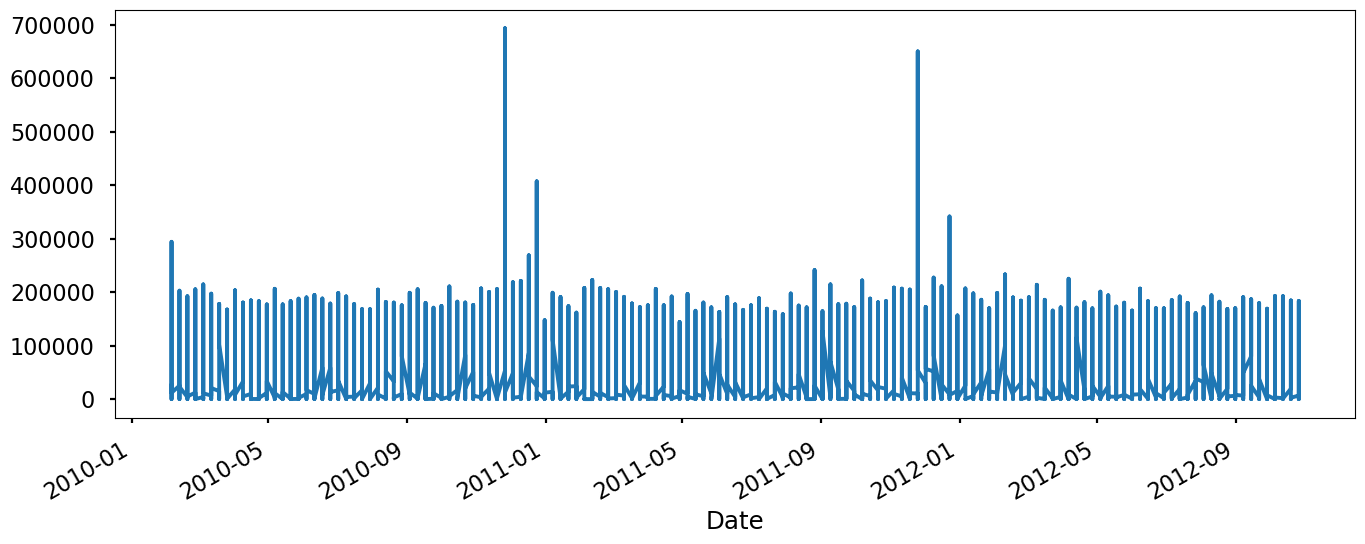

In [193]:
plt.figure(figsize=(16,6))
dfdata['Weekly_Sales'].plot()
plt.show()

- The result shows, there are lots of same data values. So, I will collect them together as weekly.

In [194]:
df_week = dfdata.resample('W').mean()

In [195]:
df_week.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Super_Bowl,Labor_Day,Thanksgiving,christmas,week,month,year
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-07,22.040394,44.161236,16887.602166,0.0,33.282800,2.717968,0.0,0.0,0.0,0.0,0.0,167.328549,8.578592,137381.684997,0.0,0.0,0.0,0.0,5.0,2.0,2010.0
2010-02-14,22.006443,44.331638,16390.912208,1.0,33.370444,2.695955,0.0,0.0,0.0,0.0,0.0,167.401961,8.567855,137675.080027,1.0,0.0,0.0,0.0,6.0,2.0,2010.0
2010-02-21,22.044444,44.287542,16255.185970,0.0,37.032596,2.673506,0.0,0.0,0.0,0.0,0.0,167.386208,8.574593,137277.810101,0.0,0.0,0.0,0.0,7.0,2.0,2010.0
2010-02-28,22.021088,44.058844,14955.932194,0.0,38.624806,2.685486,0.0,0.0,0.0,0.0,0.0,167.708233,8.562094,137365.977551,0.0,0.0,0.0,0.0,8.0,2.0,2010.0
2010-03-07,22.056199,44.019755,15964.821240,0.0,42.367490,2.731923,0.0,0.0,0.0,0.0,0.0,167.680036,8.573890,137556.273161,0.0,0.0,0.0,0.0,9.0,3.0,2010.0


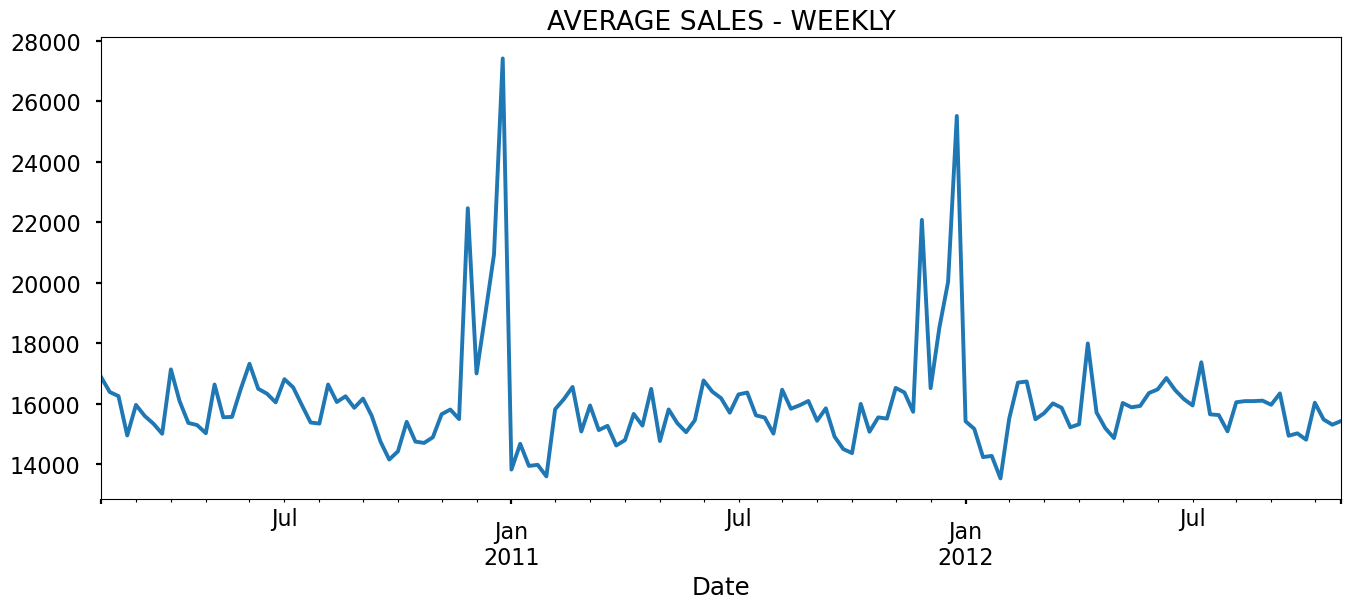

In [196]:
plt.figure(figsize=(16,6))
df_week['Weekly_Sales'].plot()
plt.title('AVERAGE SALES - WEEKLY')
plt.show()

- The result shows,With the collecting data as weekly, I can see average sales clearly. To see monthly pattern , I resampled my data to monthly also.

In [197]:
df_month = dfdata.resample('MS').mean()

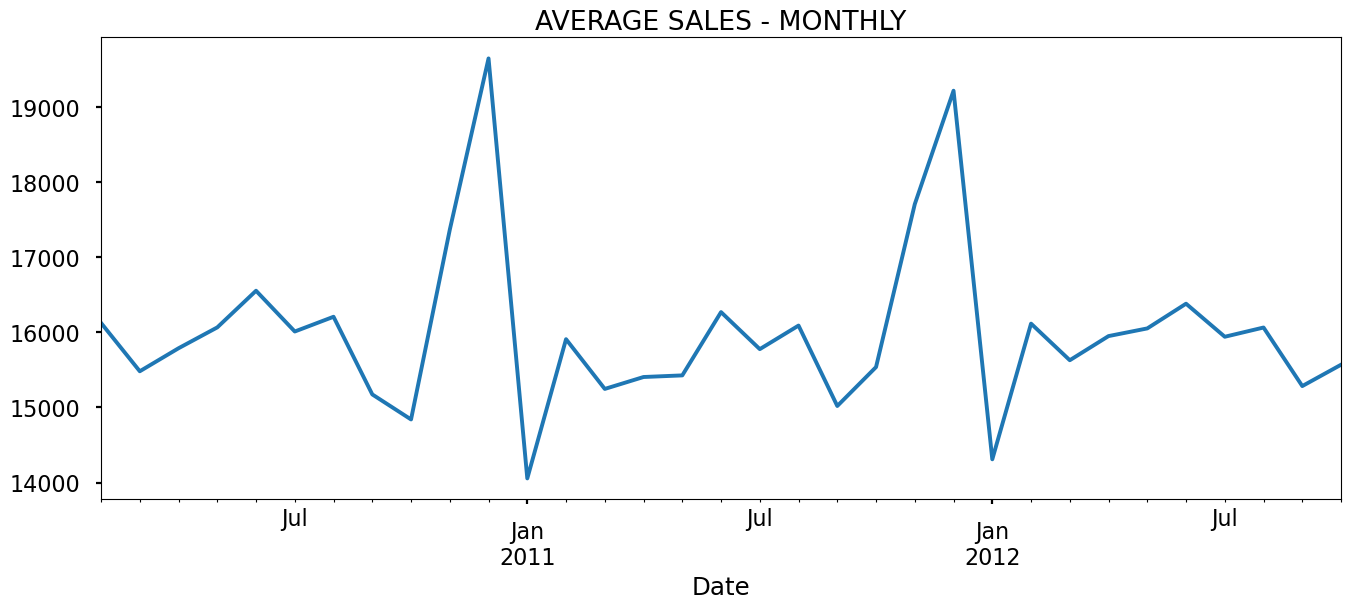

In [198]:
plt.figure(figsize=(16,6))
df_month['Weekly_Sales'].plot()
plt.title('AVERAGE SALES - MONTHLY')
plt.show()

- The result shows, When I turned data to monthly, I realized that I lost some patterns in weekly data. So, I will continue with weekly resampled data.

## To Observe 2-weeks Rolling Mean and Std

- My data is non-stationary. So, I will try to find more stationary version on it.

In [199]:
roll_mean = df_week['Weekly_Sales'].rolling(window=2, center=False).mean()

In [200]:
roll_mean

Date
2010-02-07             NaN
2010-02-14    16639.257187
2010-02-21    16323.049089
2010-02-28    15605.559082
2010-03-07    15460.376717
                  ...     
2012-09-30    14920.503157
2012-10-07    15426.531650
2012-10-14    15761.069187
2012-10-21    15398.005372
2012-10-28    15372.427778
Freq: W-SUN, Name: Weekly_Sales, Length: 143, dtype: float64

In [201]:
roll_std = df_week['Weekly_Sales'].rolling(window=2, center=False).std()

In [202]:
roll_std 

Date
2010-02-07           NaN
2010-02-14    351.212838
2010-02-21     95.972943
2010-02-28    918.711155
2010-03-07    713.392286
                 ...    
2012-09-30    148.325593
2012-10-07    863.957950
2012-10-14    390.850427
2012-10-21    122.599345
2012-10-28     86.427166
Freq: W-SUN, Name: Weekly_Sales, Length: 143, dtype: float64

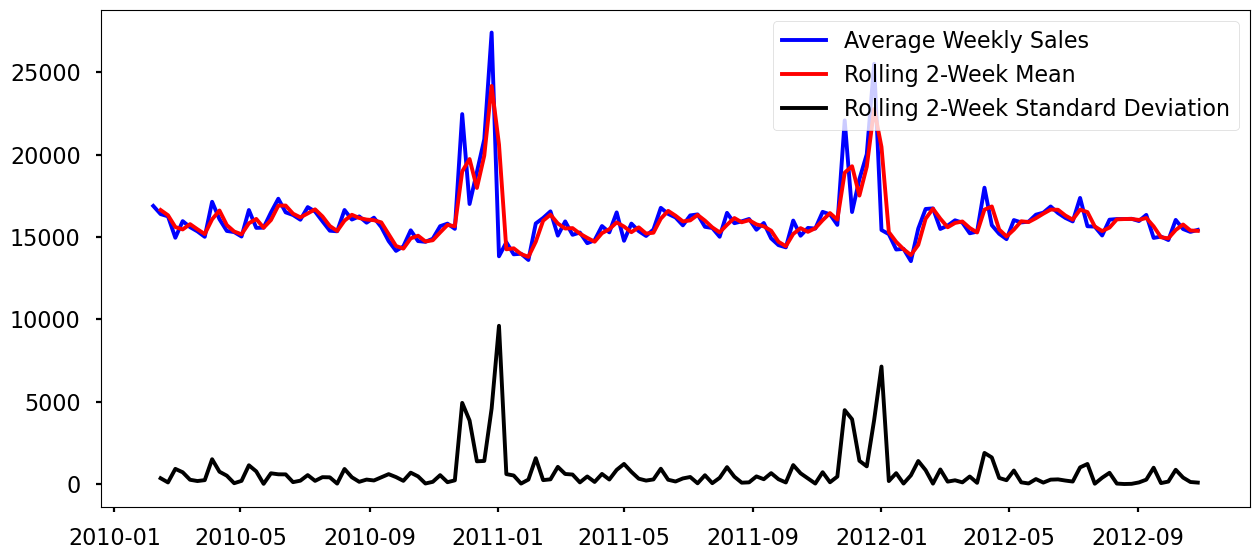

In [203]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week['Weekly_Sales'], color='blue',label='Average Weekly Sales')
ax.plot(roll_mean, color='red', label='Rolling 2-Week Mean')
ax.plot(roll_std, color='black', label='Rolling 2-Week Standard Deviation')
ax.legend()
fig.tight_layout()

In [204]:
adfuller(df_week['Weekly_Sales'])

(-5.927107223737573,
 2.4290492082042356e-07,
 4,
 138,
 {'1%': -3.47864788917503,
  '5%': -2.882721765644168,
  '10%': -2.578065326612056},
 2261.596421168073)

- From test and my observations my data is not stationary. So, I will try to find more stationary version of it

## Train - Test Split of Weekly Data

In [205]:
train_data = df_week[:int(0.7*(len(df_week)))] 
test_data = df_week[int(0.7*(len(df_week))):]

In [206]:
print('Train:', train_data.shape)

Train: (100, 21)


In [207]:
print('Test:', test_data.shape)

Test: (43, 21)


In [208]:
target = "Weekly_Sales"
used_cols = [c for c in df_week.columns.to_list() if c not in [target]] 

In [209]:
X_train = train_data[used_cols]
X_test = test_data[used_cols]
y_train = train_data[target]
y_test = test_data[target]

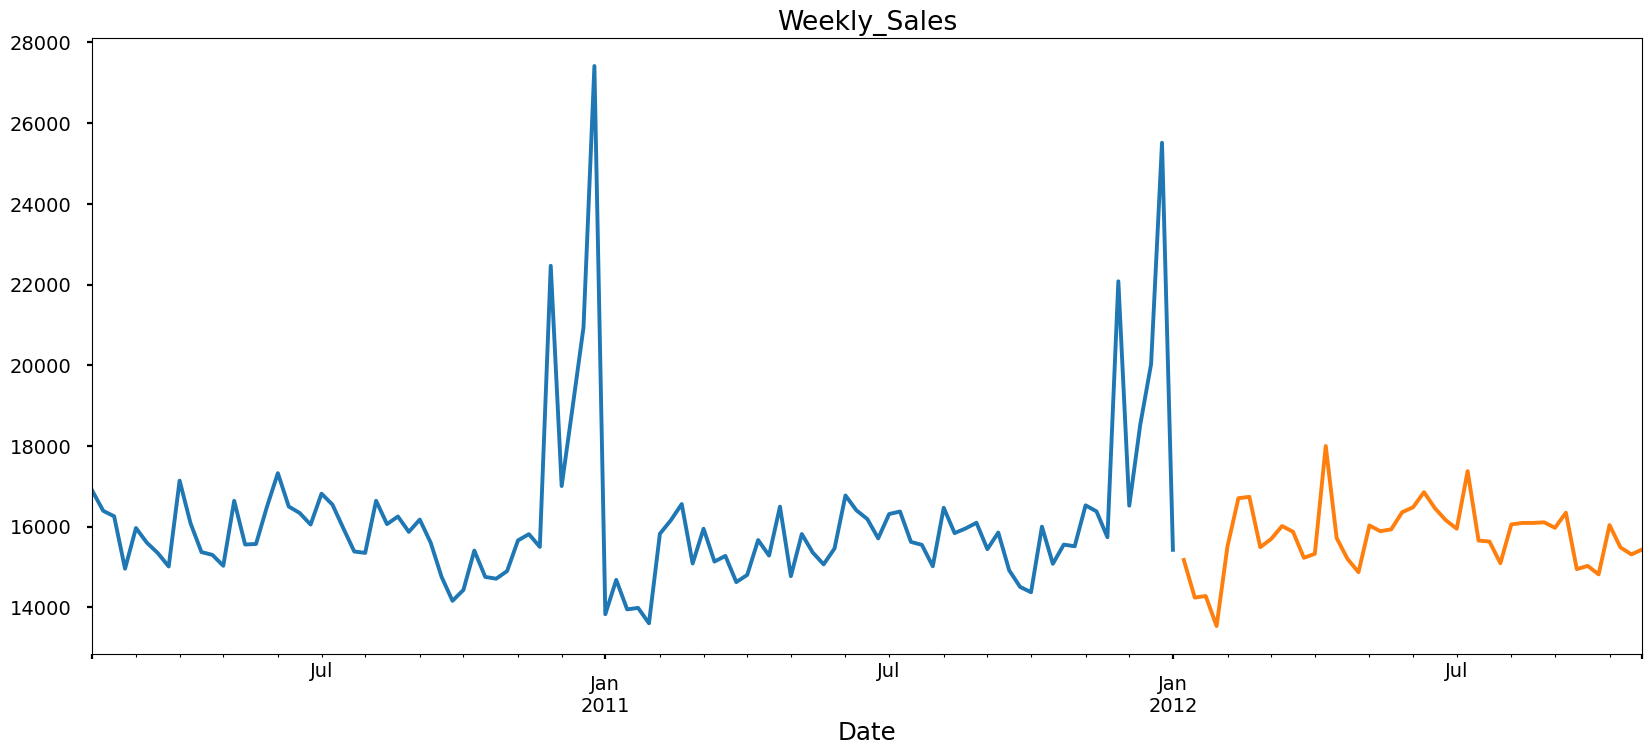

In [210]:
train_data['Weekly_Sales'].plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
test_data['Weekly_Sales'].plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
plt.show()

- Blue line represents my train data, yellow is test data.


## Decomposing Weekly Data to Observe Seasonality


In [211]:
decomposed = decompose(df_week['Weekly_Sales'].values, 'additive', m=20)

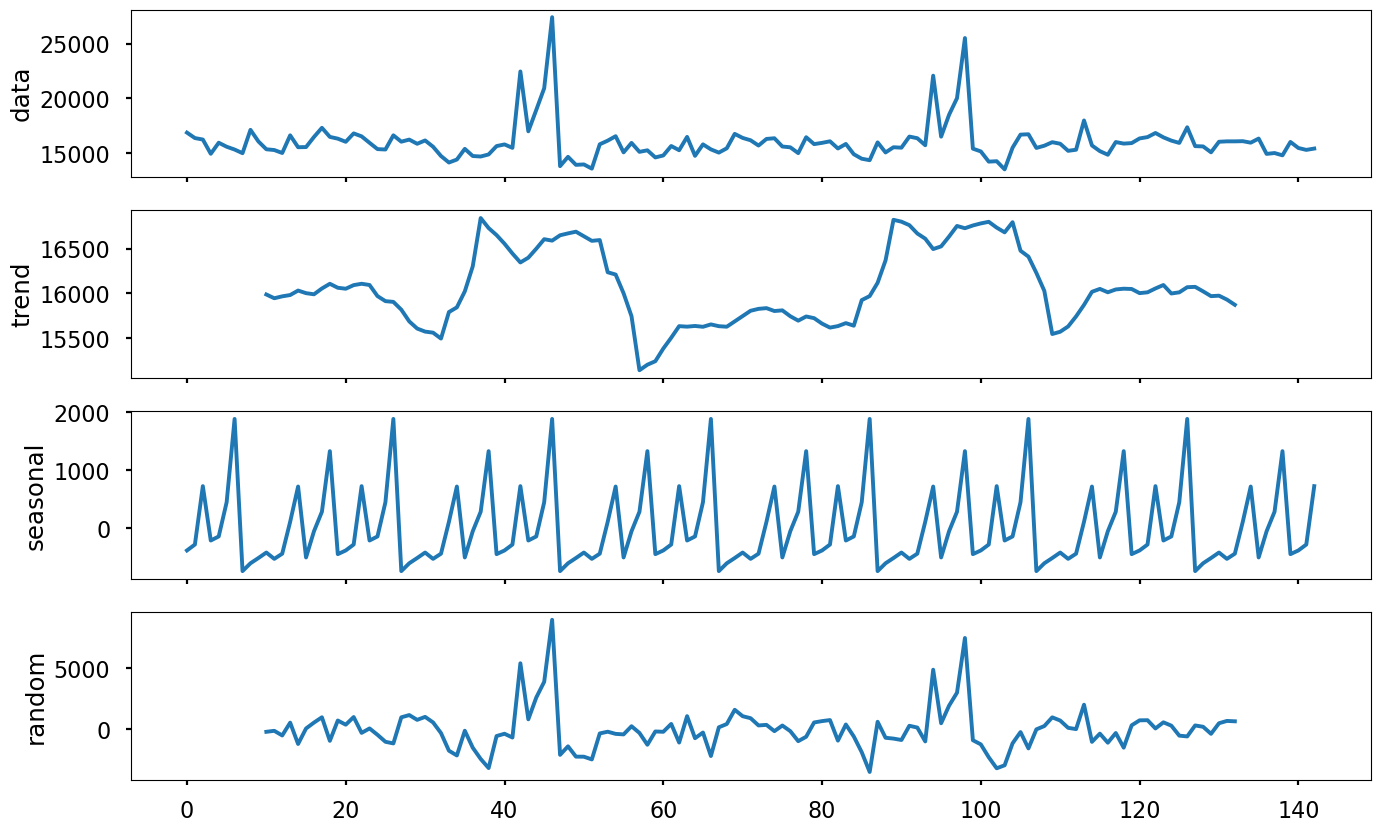

In [212]:
decomposed_plot(decomposed, figure_kwargs={'figsize': (16, 10)})
plt.show()

- The result shows that, every 20 step seasonality converges to beginning point. This helps me to tune my model.

## Trying To Make Data More Stationary

## 1. DIFFERENCE

In [213]:
df_week_diff = df_week['Weekly_Sales'].diff().dropna()

In [214]:
df_week_diff.head()

Date
2010-02-14    -496.689958
2010-02-21    -135.726238
2010-02-28   -1299.253776
2010-03-07    1008.889046
2010-03-14    -364.671335
Freq: W-SUN, Name: Weekly_Sales, dtype: float64

In [215]:
diff_roll_mean = df_week_diff.rolling(window=2, center=False).mean()

In [216]:
diff_roll_mean.head()

Date
2010-02-14           NaN
2010-02-21   -316.208098
2010-02-28   -717.490007
2010-03-07   -145.182365
2010-03-14    322.108856
Freq: W-SUN, Name: Weekly_Sales, dtype: float64

In [217]:
diff_roll_std = df_week_diff.rolling(window=2, center=False).std()

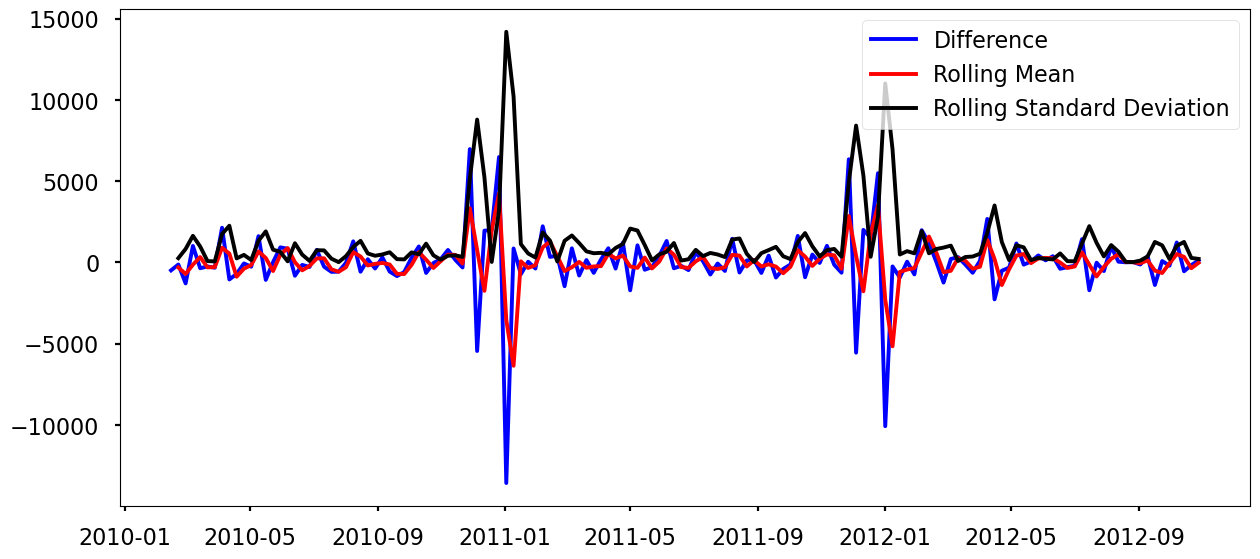

In [218]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week_diff, color='blue',label='Difference')
ax.plot(diff_roll_mean, color='red', label='Rolling Mean')
ax.plot(diff_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

## 2. SHIFT

In [219]:
df_week_lag = df_week['Weekly_Sales'].shift().dropna()

In [220]:
lag_roll_mean = df_week_lag.rolling(window=2, center=False).mean()

In [221]:
lag_roll_std = df_week_lag.rolling(window=2, center=False).std()

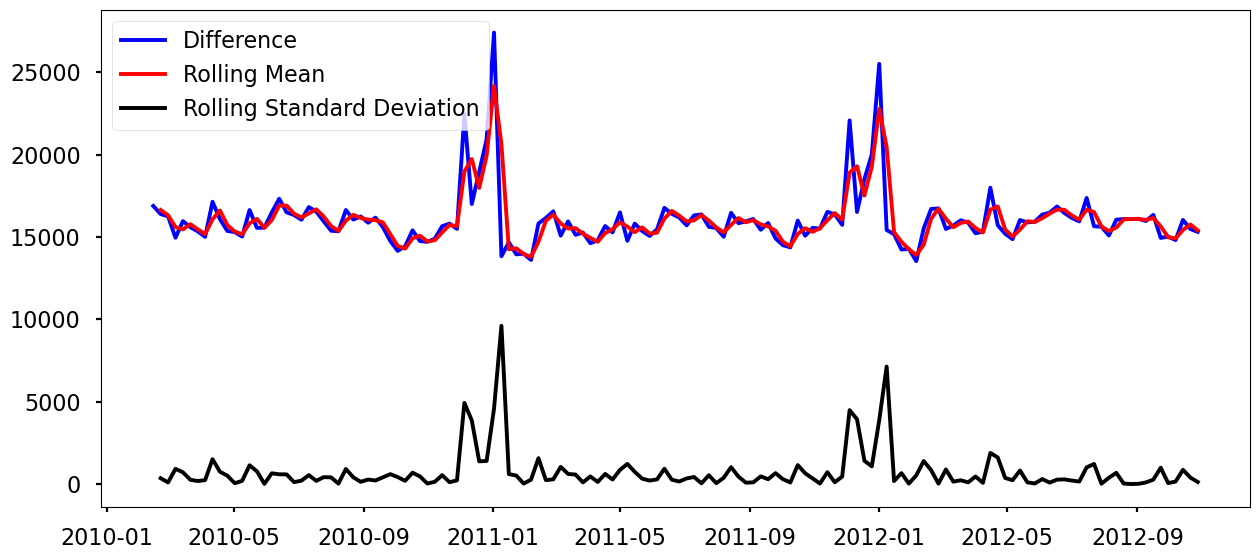

In [222]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week_lag, color='blue',label='Difference')
ax.plot(lag_roll_mean, color='red', label='Rolling Mean')
ax.plot(lag_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

## 3. LOG

In [223]:
logged_week = np.log1p(df_week['Weekly_Sales']).dropna()

In [224]:
Log_roll_mean = logged_week.rolling(window=2, center=False).mean()

In [225]:
log_roll_std = logged_week.rolling(window=2, center=False).std()

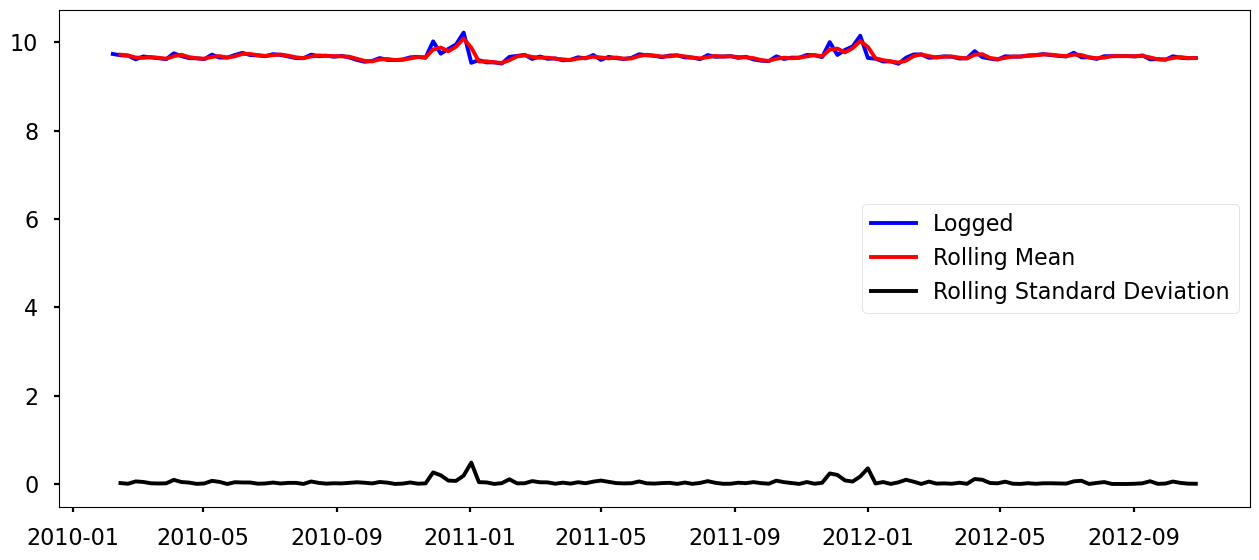

In [226]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(logged_week, color='blue',label='Logged')
ax.plot(Log_roll_mean, color='red', label='Rolling Mean')
ax.plot(log_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

## AUTO-ARIMA MODEL

- I tried my data without any changes, then tried with shifting, taking log and difference version of data. Differenced data gave best results. So, I decided to take difference and use this data.

# TRAIN_TEST_SPLIT

In [227]:
train_data_diff = df_week_diff [:int(0.7*(len(df_week_diff )))]
test_data_diff = df_week_diff [int(0.7*(len(df_week_diff ))):]

In [228]:
model_auto_arima = auto_arima(train_data_diff, trace=True,start_p=0, start_q=0, start_P=0, start_Q=0,
                  max_p=20, max_q=20, max_P=20, max_Q=20, seasonal=True,maxiter=200,
                  information_criterion='aic',stepwise=False, suppress_warnings=True, D=1, max_D=10,
                  error_action='ignore',approximation = False)
model_auto_arima.fit(train_data_diff)

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=1826.858, Time=0.16 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=1793.619, Time=0.45 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=1795.532, Time=0.17 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=1804.051, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=1794.966, Time=0.13 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=1801.215, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(3,0,0)(0,0,0)[1] intercept   : AIC=1791.045, Tim

ARIMA(maxiter=200, order=(3, 0, 2), scoring_args={},
      seasonal_order=(0, 0, 0, 1), suppress_warnings=True)

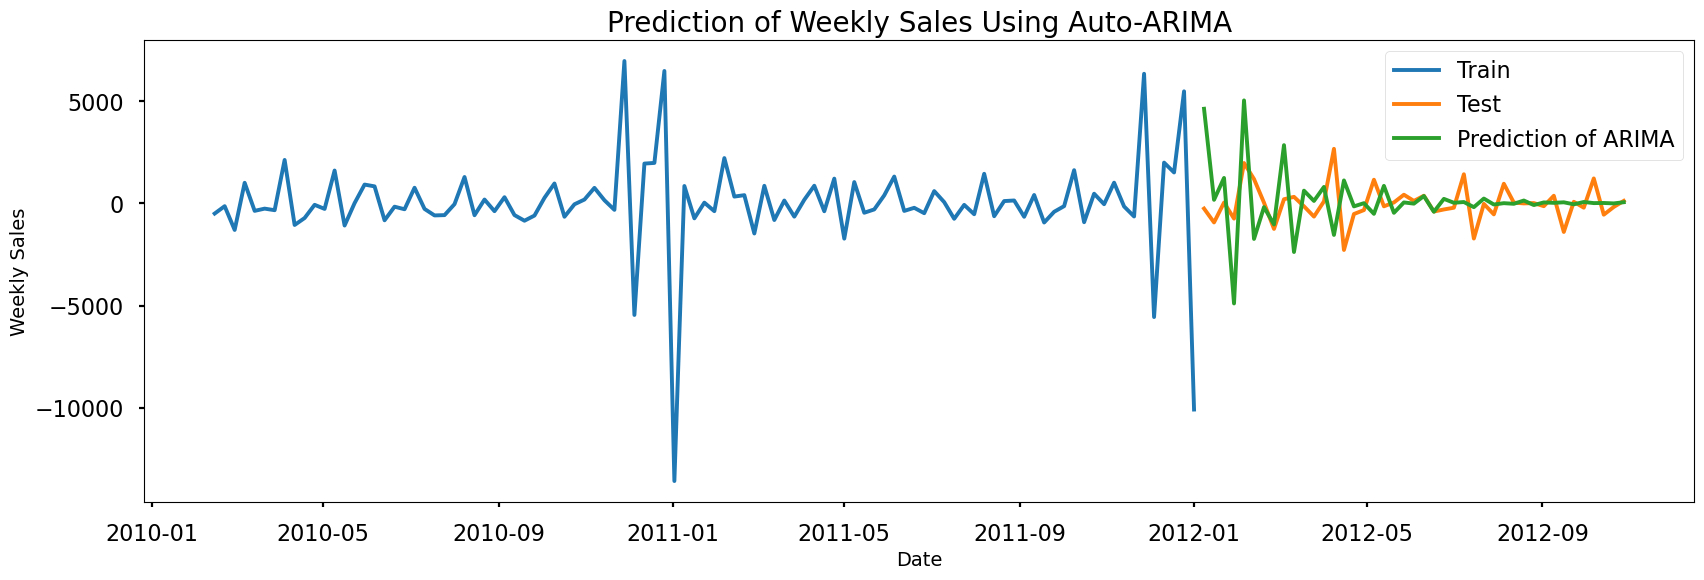

In [229]:
y_pred = model_auto_arima.predict(n_periods=len(test_data_diff))
y_pred = pd.DataFrame(y_pred,index = test_data.index,columns=['Prediction'])
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales Using Auto-ARIMA', fontsize=20)
plt.plot(train_data_diff, label='Train')
plt.plot(test_data_diff, label='Test')
plt.plot(y_pred, label='Prediction of ARIMA')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

- I do not like the pattern of predictions so I decided to try another model.

# EXPONENTIAL FORM

In [230]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

- I checked suitable Holt-Winters models according tp my data. Exponential Smooting are used when data has trend, and it flattens the trend. The damped trend method adds a damping parameter so, the trend converges to a constant value in the future.

C:\Users\utkar\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


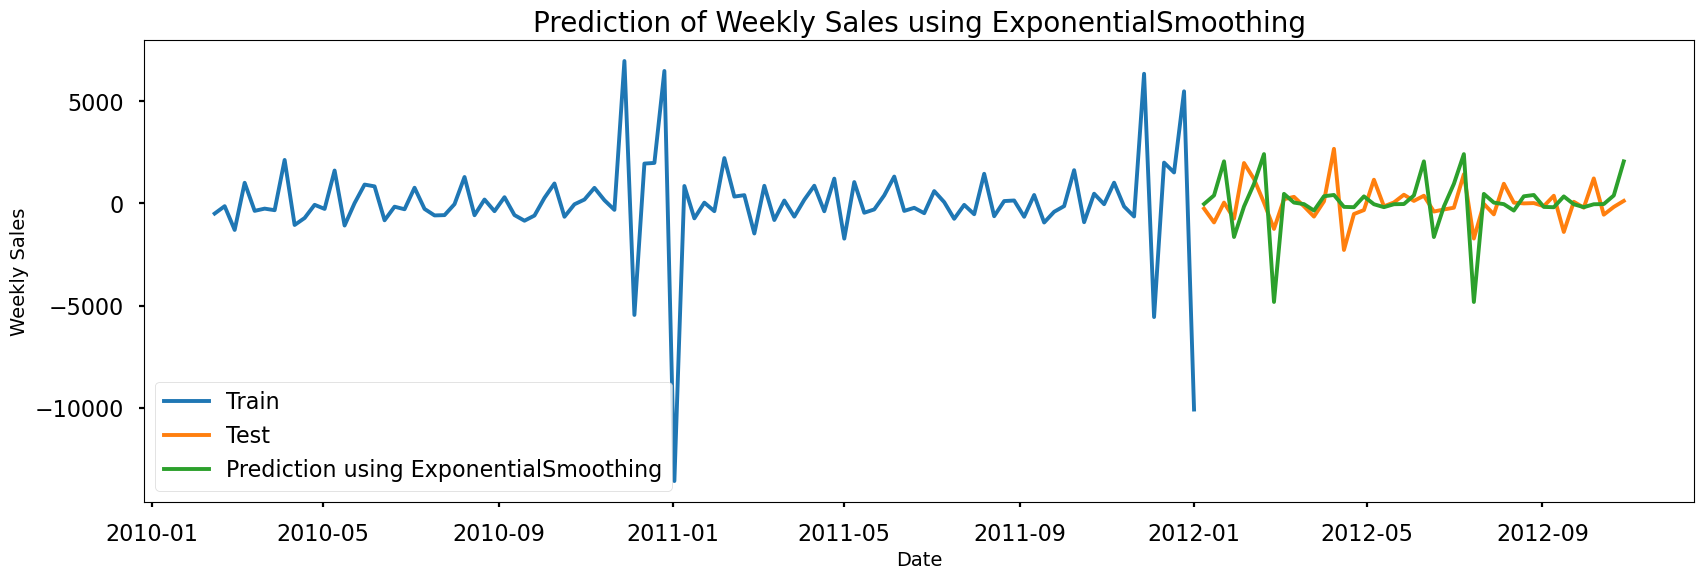

In [231]:
model_holt_winters = ExponentialSmoothing(train_data_diff, seasonal_periods=20, seasonal='additive',
                                           trend='additive',damped=True).fit() #Taking additive trend and seasonality.
y_pred = model_holt_winters.forecast(len(test_data_diff))
plt.figure(figsize=(20,6))

plt.title('Prediction of Weekly Sales using ExponentialSmoothing', fontsize=20)
plt.plot(train_data_diff, label='Train')
plt.plot(test_data_diff, label='Test')
plt.plot(y_pred, label='Prediction using ExponentialSmoothing')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()